# Исследование объявлений о продаже квартир в Санкт-Петербурге

**Описание проекта**

Используя данные сервиса Яндекс.Недвижимость (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет) определим рыночную стоимость объектов недвижимости, отследим аномалии и мошенническую деятельность.

**Описание данных**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Даннные предоставлены сервисом Яндекс.Недвижимость (файл real_estate_data.csv) и содержат следующую информацию:

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

**Ход исследования**

1. Откроем файл с данными и изучим общую информацию.
2. Предобработка данных.
3. Посчитаем и добавим в таблицу новые столбцы.
4. Исследовательский анализ данных.
5. Общий вывод.

**Навыки и инструменты**

   `Python`  
   `Pandas`  
   `Matplotlib`  

`Предобработка данных`  
`Исследовательский анализ`  
`Визуализация данных`  

**Вывод**

Исходя из проведенного исследования можно сделать следующие выводы:  
-    Наибольшая зависимость цены объекта от общей площади объекта. Также наблюдается зависимость стоимости объекта от жилой площади и площади кухни, но она слабее, чем зависимость от общей площади.    

-    Стоимость недвижимости не на первом и не на последнем этажах выше, чем на указанных этажах.   

-    Количество комнат несильно, но влияет на стоимость объекта. Чем больше комнат, тем дороже недвижимость, но если комнат не более 4-х.    

-    Нет однозначной зависимости от дня, месяца, года размещения объявления о продаже недвижимости.  

-    Большинство объектов продаётся за 1 год и 5 месяцев. В среднем продажа квартиры занимает около 6 месяцев. 

-    Наибольшая средняя стоимость квадратного метра недвижимости в самом крупном городе - Санкт-Петербурге. По мере удаления от центра города стоимость за квадратный метр недвижимости ожидаемо снижается, за исключением новых и элитных районов, где стоимость, как правило выше. Также можно отметить, что в некоторых пригородах Санкт-Петербурга (например, город Пушкин), из-за их осбенностей (исторической популярности и ценности),  несмотря на удаление от центра стоимость жилья может быть выше, чем в соседних населенных пунктах.

### Откроем файл с данными и изучим общую информацию

#### Импортируем библиотеки, cчитаем данные из csv-файла в датафрейм и сохраним в переменную `data`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 50

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

#### Выведем первые 10 строчек датафрейма `data`

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


#### Выведем основную информацию о датафрейме `data` с помощью метода `info()`

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 23 699 строк и 22 столбца.  

Типы данных столбцов —  `bool`, `float64`, `int64`, `object`. 
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Сохраним неизменнённый датафрейм `data` в переменную `old_data`, чтобы после предобработки вывести % удалённых данных.

In [5]:
old_data = data

#### Построим общую гистограмму для всех столбцов таблицы методом `hist()`

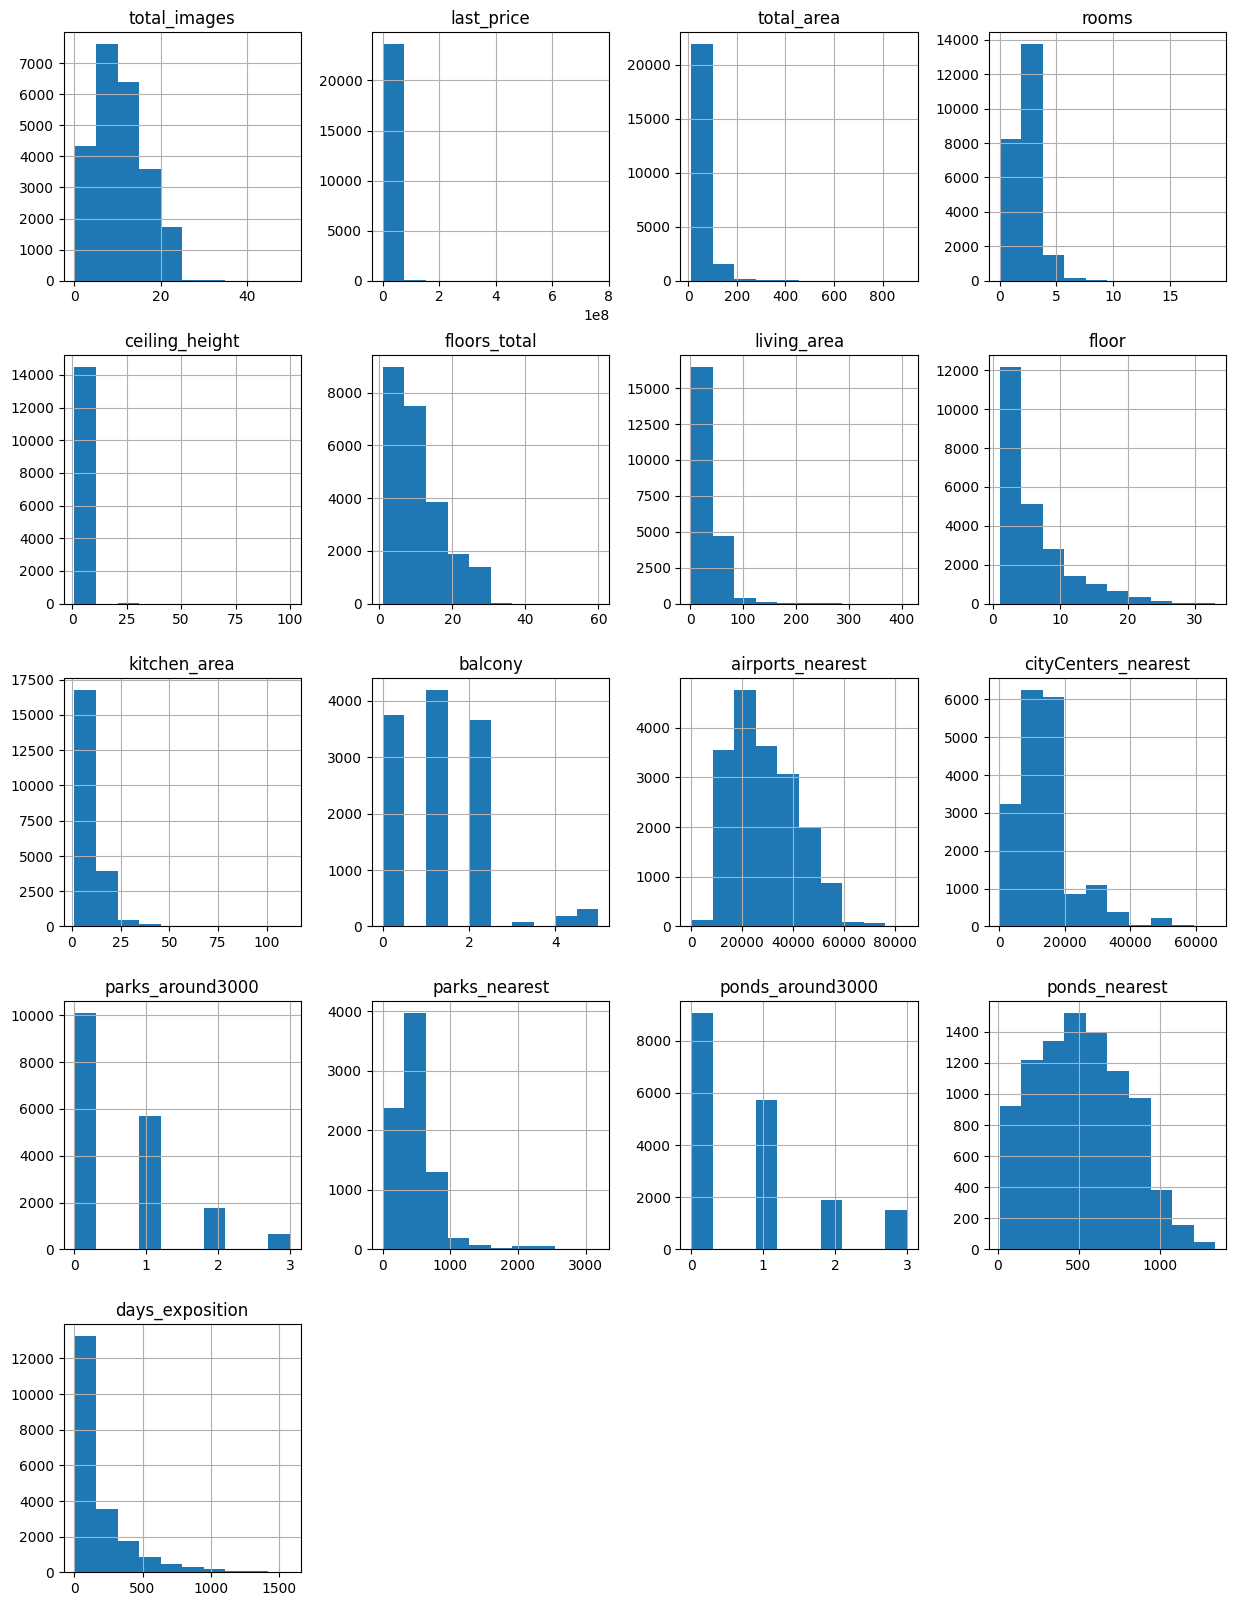

In [6]:
data.hist(figsize=(15, 20))
plt.show()

Построенные гистограммы дают приблизительное представление о том, каким образом данные распределены по всему диапазону. На большинстве графиков данные смещены влево, распределение данных похоже на распределение Пуассона.

**Выводы:**

Всего у нас в таблице 23699 строк и 22 столбца. В каждой строке таблицы — данные объявления о продаже квартиры в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Часть столбцов описывает саму квартиру (площадь, количество комнат, этаж, фото и т.д.), часть колонок описывает расстояние до центра города, аэропорта, парка, водоёма и т.д., часть колонок описывает саму публикацию (дата размещения объявления о продаже, сколько дней было размещено объявление, цену на момент снятия объявления и т.д.). По каждой квартире на продажу часть данных были внесены пользователем, а часть получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и т.д.). 

Предварительно можно утверждать, что данных достаточно для решенения нашей задачи. Но как в данных пользователя, так в и картографических данных встречаются пропущенные значения, в названии колонок `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` — расхождение с хорошим стилем.

Чтобы двигаться дальше, устраним проблемы в данных.

### Предобработка данных

#### Переименуем столбцы `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` в соответствии с хорошим стилем

In [7]:
data.rename(columns= {'cityCenters_nearest': 'city_centers_nearest',\
                      'parks_around3000':'parks_around',\
                      'ponds_around3000':'ponds_around'\
                     }, 
            inplace=True)

Проверим названия столбцов.

In [8]:
for i in range(len(data.columns)): 
    print(data.columns[i])

total_images
last_price
total_area
first_day_exposition
rooms
ceiling_height
floors_total
living_area
floor
is_apartment
studio
open_plan
kitchen_area
balcony
locality_name
airports_nearest
city_centers_nearest
parks_around
parks_nearest
ponds_around
ponds_nearest
days_exposition


Всё верно, столбцы `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` были переименованы в соответственно в столбцы  — `city_centers_nearest`, `parks_around`, `ponds_around`.

#### Найдём и изучим пропущенные значения в столбцах

##### Определим, в каких столбцах есть пропуски

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around             5518
parks_nearest           15620
ponds_around             5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски есть в 14 столбцах:
*	`ceiling_height` — высота потолков (м)
*	`floors_total` — всего этажей в доме
*	`living_area` — жилая площадь в квадратных метрах (м²)
*	`is_apartment` — апартаменты (булев тип)
*	`kitchen_area` — площадь кухни в квадратных метрах (м²)
*	`balcony` — число балконов
*	`locality_name` — название населённого пункта
*	`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
*	`city_сenters_nearest` — расстояние до центра города (м)
*	`parks_around` — число парков в радиусе 3 км
*	`parks_nearest` — расстояние до ближайшего парка (м)
*	`ponds_around` — число водоёмов в радиусе 3 км
*	`ponds_nearest` — расстояние до ближайшего водоёма (м)
*	`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

##### Пропуски в столбце `ceiling_height`

Посмотрим долю пропусков в столбце "ceiling_height" - высота потолков.

In [10]:
data['ceiling_height'].isna().mean()

0.38799105447487237

Пропуски в столбце `ceiling_height` составляют ~ 39% от выборки, это большая величина, поэтому их следует заполнить. 

Посмотрим описание данных столбца методом `describe()` и уникальные значения столбца методом `unique()`.

In [11]:
# выведем описание данных столбца
data['ceiling_height'].describe()

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

In [12]:
# выведем все уникальные значения высоты потолков по возрастанию
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

   Разброс значений высоты потолков большой - от 1 до 100 метров, среднее и медиана отличаются незначительно. Есть выбивающиеся (аномальные) значения высоты потолков - менее 2-х метров, более 8 метров (при учёте, что в объявлениях могут быть двухэтажные квартиры с высотой потолков каждого этажа - 4 м), пока оставим эти значения как есть.

Посмотрим взаимосвязь высоты потолков и других параметров таблицы.

In [13]:
# выведем значения корреляции высоты потолков и других параметров таблицы
data.corr().sort_values(by='ceiling_height', ascending=False)['ceiling_height'].reset_index().head(5)

C:\Users\my_pc\AppData\Local\Temp\ipykernel_636\103410637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().sort_values(by='ceiling_height', ascending=False)['ceiling_height'].reset_index().head(5)


,index,ceiling_height
0,ceiling_height,1.00
1,total_area,0.10
2,living_area,0.09
3,kitchen_area,0.09
4,last_price,0.09


Больше всего данные высоты потолков коррелируют с данными общей площади, но связь несильная. 

Заменим пропущенные значения высоты потолков в столбце `ceiling_height` на медианное значение, т.к. оно в отличии от среднего не подверженно влиянию выбросов, которые есть в наших данных.

In [14]:
# заменяем пропущенные значения в столбце "ceiling_height" на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Проверим остались ли пропуски в столбце `ceiling_height`.

In [15]:
print('Количество пропусков в столбце "ceiling_height":', data['ceiling_height'].isna().sum())

Количество пропусков в столбце "ceiling_height": 0


In [16]:
# выведем описание данных столбца
data['ceiling_height'].describe()

count   23,699.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

После заполнения пропусков в столбце "высота потолка" среднее незначительно уменьшилось, медиана осталась такой же, стандартное отклонение уменьшилось с 1.26 до 0.99 м.

##### Пропуски в столбце `floors_total`

Посмотрим долю пропусков в столбце "floors_total" - всего этажей в доме.

In [17]:
data['floors_total'].isna().mean()

0.0036288450989493226

Пропуски в столбце `floors_total` составляют всего ~ 0.36% от выборки, это немного.

Посмотрим уникальные значения и описание данных столбца методами `describe()` и `unique()`.

In [18]:
# выведем описание данных столбца
data['floors_total'].describe()

count   23,613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

In [19]:
# выведем все уникальные значения количества этажей в доме по возрастанию
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

В целом значения выглядят правдоподобно, возможно максимальные значения могут быть неверными или с ошибками, пока не будем их трогать, проверим их позже.

Посмотрим взаимосвязь этажей в доме и других параметров таблицы.

In [20]:
# выведем значения корреляции этажей в доме и других параметров таблицы
data.corr().sort_values(by='floors_total', ascending=False)['floors_total'].reset_index().head(5)

C:\Users\my_pc\AppData\Local\Temp\ipykernel_636\1173455319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().sort_values(by='floors_total', ascending=False)['floors_total'].reset_index().head(5)


,index,floors_total
0,floors_total,1.00
1,floor,0.68
2,balcony,0.19
3,kitchen_area,0.16
4,airports_nearest,0.11


Количество этажей в доме хорошо коррелируют этажом квартиры, связь хорошая, но не максимальная. 

Т.к. пропущенных значений мало мы можем удалить строки с пропусками в столбце `floors_total`.

In [21]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

Проверим количество строк в `data` после удаления пропусков.

In [22]:
print('Количество строк в "data":', data.shape[0])

Количество строк в "data": 23613


Проверим остались ли пропуски в столбце `floors_total`.

In [23]:
print('Количество пропусков в столбце "floors_total":', data['floors_total'].isna().sum())

Количество пропусков в столбце "floors_total": 0


##### Пропуски в столбце `living_area`

Посмотрим долю пропусков в столбце "living_area" - жилая площадь в квадратных метрах (м²).

In [24]:
data['living_area'].isna().mean()

0.07919366450683946

Пропуски в столбце `living_area` составляют ~ 8% от выборки, посмотрим на данные методом `describe()`.

In [25]:
data['living_area'].describe()

count   21,743.00
mean        34.46
std         22.04
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

Разброс значений от 2.00 до 409.70 м2. Миниальное значение 2.00 похоже на ошибку, пока оставим, как есть. Среднее и медиана отличаются незначительно. 

Посмотрим взаимосвязь жилой площади и других параметров таблицы.

In [26]:
# выведем значения корреляции жилой площади и других параметров таблицы
data.corr().sort_values(by='living_area', ascending=False)['living_area'].reset_index().head(5)

C:\Users\my_pc\AppData\Local\Temp\ipykernel_636\3515760876.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().sort_values(by='living_area', ascending=False)['living_area'].reset_index().head(5)


,index,living_area
0,living_area,1.00
1,total_area,0.94
2,rooms,0.85
3,last_price,0.57
4,kitchen_area,0.43


Данные жилой площади очень хорошо коррелируют с данными общей площади, связь сильная.

Построим диаграмму рассеяния изменения жилой площади `living_area` и общей площади `total_area`.

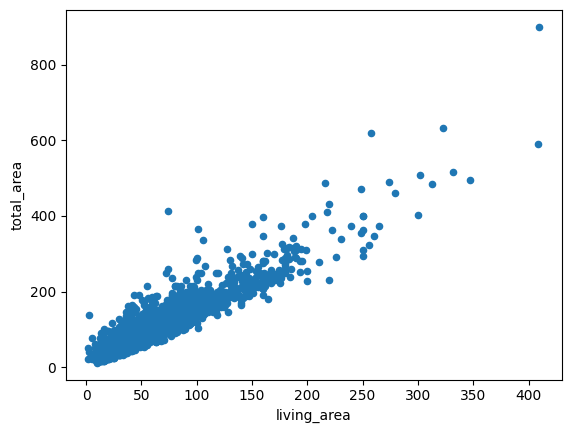

In [27]:
data.plot(x='living_area', y='total_area', kind='scatter')
plt.show()

На диаграмме видно, что с ростом общей площади, растёт и жилая площадь.

Заполним пропуски в столбце `living_area` отношением медианы жилой площади к медиане общей площади, умноженным на общую площадь. 

In [28]:
data['living_area'].fillna((data['living_area'].median() / data['total_area'].median()) * data['total_area'], inplace=True)

Проверим остались ли ещё пропуски в столбце.

In [29]:
print('Количество пропусков в столбце "living_area":', data['living_area'].isna().sum())

Количество пропусков в столбце "living_area": 0


После заполнения пропусков выведем описание столбца методом `describe()`.

In [30]:
# выведем описание данных столбца
data['living_area'].describe()

count   23,613.00
mean        34.63
std         22.39
min          2.00
25%         19.00
50%         30.00
75%         42.17
max        409.70
Name: living_area, dtype: float64

После заполнения пропусков в столбце "жилая площадь" значения среднего, медиана, стандартное отклонение практически не изменились.

##### Пропуски в столбце `kitchen_area`

Посмотрим долю пропусков в столбце "kitchen_area" - площадь кухни в квадратных метрах (м2).

In [31]:
data['kitchen_area'].isna().mean()

0.09448185321644857

Пропуски в столбце `kitchen_area` составляют ~ 9% от выборки, посмотрим на данные методом `describe()` и `unique()`.

In [32]:
data['kitchen_area'].describe()

count   21,382.00
mean        10.56
std          5.90
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

Разброс значений от 1.30 до 112.00 м2. Среднее и медиана отличаются незначительно. Миниальное значение очень мало для площади кухни, нужно проверить миниальные значения площади кухни, но пока оставим как есть.

Посмотрим взаимосвязь площади кухни и других параметров таблицы.

In [33]:
# выведем значения корреляции жилой площади и других параметров таблицы
data.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'].reset_index().head(5)

C:\Users\my_pc\AppData\Local\Temp\ipykernel_636\3158130197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'].reset_index().head(5)


,index,kitchen_area
0,kitchen_area,1.00
1,total_area,0.61
2,last_price,0.52
3,living_area,0.44
4,rooms,0.27


Данные площади кухни хорошо коррелируют с данными общей площади, но связь не такая сильная, как между жилой и общей площадью.

Построим диаграмму рассеяния изменения жилой площади `kitchen_area` и общей площади `total_area`.

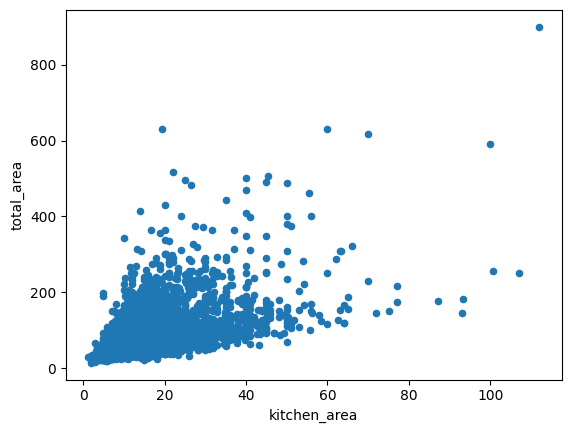

In [34]:
data.plot(x='kitchen_area', y='total_area', kind='scatter')
plt.show()

На диаграмме видно, что с ростом общей площади, растёт и площадь кухни. Но график не такой линейный, как в случае с жилой и общей площадью.

Заполним пропуски в столбце `kitchen_area` отношением медианы жилой площади к медиане общей площади, умноженным на общую площадь.

In [35]:
data['kitchen_area'].fillna((data['kitchen_area'].median() / data['total_area'].median()) * data['total_area'], inplace=True)

Проверим остались ли ещё пропуски в столбце.

In [36]:
print('Количество пропусков в столбце "kitchen_area":', data['living_area'].isna().sum())

Количество пропусков в столбце "kitchen_area": 0


После заполнения пропусков выведем описание столбца методом `describe()`.

In [37]:
# выведем описание данных столбца
data['kitchen_area'].describe()

count   23,613.00
mean        10.50
std          6.04
min          1.30
25%          7.00
50%          9.00
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

После заполнения пропусков в столбце "площадь кухни" значения среднего и медиана незначительно уменьшились, а стандартное отклонение незначительно увеличилось.

##### Пропуски в столбце `is_apartment`

Посмотрим долю пропусков в столбце "is_apartment" - апартаменты.

In [38]:
data['is_apartment'].isna().mean()

0.8824799898361072

Пропуски по столбцу `is_apartment`, характеризующему принадлежность квартиры к апартаментам, составляют ~88% от выборки. Это очень большая величина, поэтому их следует обработать.

Рассмотрим данный столбец подробнее методом `describe()` и `unique()`.

In [39]:
data['is_apartment'].describe()

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

In [40]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Данный столбец является булевым и может принимать значения либо `True`, либо `False`. Скорее всего пропуски возникли, потому что пользователи не отметили этот пункт как отвечающий данному условию, поэтому заполним пропуски - `False`.

In [41]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Проверим остались ли ещё пропуски в столбце.

In [42]:
print('Количество пропусков в столбце "is_apartment":', data['is_apartment'].isna().sum())

Количество пропусков в столбце "is_apartment": 0


##### Пропуски в столбце `balcony`

Посмотрим долю пропусков в столбце "balcony" - число балконов.

In [43]:
data['balcony'].isna().mean()

0.48617287087621225

Пропуски в столбце `balcony` составляют ~49%, почти половину от выборки, их следует обработать.

Рассмотрим информацию, которая характеризует данный столбец подробнее методом `describe` и методом `unique`.

In [44]:
data['balcony'].describe()

count   12,133.00
mean         1.15
std          1.07
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          5.00
Name: balcony, dtype: float64

In [45]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Данные похожи на правду. Мы видим, что есть квартиры с 4-мя и даже 5-ю балконами, возможно такие квартиры существуют, либо это могут быть ошибки, пока оставим данные без изменений. Пропуски в этом столбце скорее всего возникли, потому что пользователи не отметили этот пункт как отвечающий данному условию, то есть у них нет балконов в квартире, поэтому заменим пропуски - на "0".

In [46]:
data['balcony'] = data['balcony'].fillna(0)

Проверим остались ли ещё пропуски в столбце.

In [47]:
print('Количество пропусков в столбце "balcony":', data['balcony'].isna().sum())

Количество пропусков в столбце "balcony": 0


##### Пропуски в столбце `locality_name`

Посмотрим долю пропусков в столбце "locality_name" - название населённого пункта.

In [48]:
data['locality_name'].isna().mean()

0.002032778554186253

Пропуски в столбце `locality_name` составляют всего ~0.2% - это несущественно. Так как у нас нет необходимой информации для заполнения этого столбца, пропуски в этом столбце не будем заполнять.

##### Пропуски в столбце `airports_nearest`

Посмотрим долю пропусков в столбце "airports_nearest" - расстояние до ближайшего аэропорта в метрах (м).

In [49]:
data['airports_nearest'].isna().mean()

0.2342777283699657

Пропуски в данном столбце составляют ~23% - это существенно. Т.к. это картографические данные, то скорее всего пропуски вызваны ошибкой картографического сервиса или ошибкой выгрузки данных. По имеющимся данным мы не можем определить расстояние до ближайшего аэропорта в метрах, поэтому оставим пропуски в этом столбце без изменений.

##### Пропуски в столбце `city_centers_nearest`

Посмотрим долю пропусков в столбце "city_centers_nearest".

In [50]:
data['city_centers_nearest'].isna().mean()

0.23330368864608478

Пропуски в данном столбце составляют ~23% - это существенно. Т.к. это картографические данные, а не добавленые пользователем, то скорее всего пропуски вызваны ошибкой картографического сервиса или ошибкой выгрузки данных. По имеющимся данным мы не можем определить расстояние до центра города в метрах, поэтому оставим пропуски без изменений.

##### Пропуски в столбце `parks_around`

Посмотрим долю пропусков в столбце.

In [51]:
data['parks_around'].isna().mean()

0.23326133909287258

Пропуски в данном столбце составляют ~23% - это существенно. Т.к. это картографические данные, а не добавленые пользователем, то скорее всего пропуски вызваны ошибкой картографического сервиса или ошибкой выгрузки данных. По имеющимся данным мы не можем определить число парков в радиусе 3 км, поэтому оставим пропуски без изменений.

##### Пропуски в столбце `parks_nearest`

Посмотрим долю пропусков в столбце.

In [52]:
data['parks_nearest'].isna().mean()

0.6592978444077415

Пропуски в данном столбце составляют ~66% - это существенно. Т.к. это картографические данные, а не добавленые пользователем, то скорее всего пропуски вызваны ошибкой картографического сервиса или ошибкой выгрузки данных. По имеющимся данным мы не можем определить расстояние до ближайшего парка в метрах, поэтому оставим пропуски без изменений.

##### Пропуски в столбце `ponds_around`

Посмотрим долю пропусков в столбце.

In [53]:
data['ponds_around'].isna().mean()

0.23326133909287258

Пропуски в данном столбце составляют ~23% - это существенно. Т.к. это картографические данные, а не добавленые пользователем, то скорее всего пропуски вызваны ошибкой картографического сервиса или ошибкой выгрузки данных. По имеющимся данным мы не можем определить число водоёмов в радиусе 3 км, поэтому оставим пропуски без изменений.

##### Пропуски в столбце `ponds_nearest`

Посмотрим долю пропусков в столбце.

In [54]:
data['ponds_nearest'].isna().mean()

0.6162706983441325

Пропуски в данном столбце составляют ~62% - это существенно. Т.к. это картографические данные, а не добавленые пользователем, то скорее всего пропуски вызваны ошибкой картографического сервиса или ошибкой выгрузки данных. По имеющимся данным мы не можем определить расстояние до ближайшего водоёма в метрах, поэтому оставим пропуски без изменений.

##### Пропуски в столбце `days_exposition`

Посмотрим долю пропусков в столбце "days_exposition" - сколько дней было размещено объявление (от публикации до снятия).

In [55]:
data['days_exposition'].isna().mean()

0.13433278278914157

Пропуски в данном столбце составляют ~13% и могут быть связаны с тем, что недвижимость не была продана и объявление не было "снято" с размещения в момент выгрузки данных. Т.к. нет информации о продаже квартир, у которых не указано количество дней размещения объявления, мы не можем заполнить корректно пропуски, оставим как есть.

##### Проверим сколько осталось пропусков в данных

In [56]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around             5508
parks_nearest           15568
ponds_around             5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Полностью мы не смогли заполнить все пропуски из-за отсутствия дополнительных данных, но пропусков стало меньше.

#### Рассмотрим типы данных в каждом столбце

##### Найдём столбцы, в которых нужно изменить тип данных

In [57]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around            float64
parks_nearest           float64
ponds_around            float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Необходимо изменить тип данных столбцов: 
*	`first_day_exposition` — с **object** на **datetime**, поскольку этот столбец имеет данные о дате и времени.
*	`floors_total` — с **float** на **int**, так как количество этажей в доме - это целое число.
*	`balcony` — с **float** на **int**, так как число балконов может быть только целочисленным.
*	`parks_around` — с **float** на **int**, так как число парков - это целое число.
*	`ponds_around` — с **float** на **int**, так как число водоёмов может быть только целочисленным.
*	`days_exposition` — с **float** на **int**, количество дней размещения объявления - целочисленное значение.

##### Преобразуем тип данных в выбранных столбцах

Изменим тип данных столбца `first_day_exposition` с **object** на **datetime**.

In [58]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23608   2017-03-21
23609   2018-01-15
23610   2018-02-11
23611   2017-03-28
23612   2017-07-21
Name: first_day_exposition, Length: 23613, dtype: datetime64[ns]

Изменим тип данных столбца `floors_total` — с **float** на **int**.

In [59]:
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total']

0        16
1        11
2         5
3        14
4        14
         ..
23608     5
23609     5
23610     3
23611    17
23612     5
Name: floors_total, Length: 23613, dtype: int32

Изменим тип данных столбца `balcony` — с **float** на **int**.

In [60]:
data['balcony'] = data['balcony'].astype('int')
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23608    0
23609    0
23610    0
23611    2
23612    0
Name: balcony, Length: 23613, dtype: int32

Изменить тип данных в столбцах `parks_around`, `ponds_around`, `days_exposition` с **float** на **int** не получится из-за имеющихся в этих столбцах пропусках, которые мы решили не заполнять из-за остутствия дополнительных данных. При заполнении пропусков числовым занчением можно будет изменить и тип данных в этих столбцах.

Проверим изменение типов данных в столбцах

In [61]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around                   float64
parks_nearest                  float64
ponds_around                   float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Изменили тип данных в столбцах: 
*	`first_day_exposition`
*	`floors_total`
*	`balcony`

#### Изучим уникальные значения в столбце с названиями `locality_name` и устраним неявные дубликаты

In [62]:
# выведем уникальные значения столбца "locality_name" в алфавитном порядке
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [63]:
# выведем количество уникальных совпадений в столбце "locality_name"
data['locality_name'].value_counts()

Санкт-Петербург                    15651
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

Всего в столбце 364 названия населенных пунктов. В списке населенных пунктов видно, что слово посёлок написано как с буквой "ё", так и с буквой "е". Также в названиях встречаются: "городской поселок", "городской посёлок", "поселок городского типа" и "посёлок городского типа". Можно заменить букву "ё" на "е", а словосочетания "городской поселок" и "поселок городского типа" на "поселок", т.к. основным в этих словосочетаниях является слово "поселок".

##### Заменим букву `ё` на `е`

In [64]:
data = data.replace('ё', 'е', regex=True)
data['locality_name'].value_counts()

Санкт-Петербург                     15651
поселок Мурино                        552
поселок Шушары                        439
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
поселок Дзержинского                    1
Name: locality_name, Length: 330, dtype: int64

После замены у нас осталось 330 названий населенных пунктов.

##### Заменим `городской поселок` и `поселок городского типа` на `поселок`

In [65]:
data = data.replace('городской поселок', 'поселок', regex=True)
data = data.replace('поселок городского типа', 'поселок', regex=True)

Выведем список уникальных значений населенных пунктов после произведенных замен и посчитаем их количество.

In [66]:
# выведем уникальные значения столбца "locality_name" в алфавитном порядке
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [67]:
# выведем количество уникальных совпадений в столбце "locality_name"
data['locality_name'].value_counts()

Санкт-Петербург         15651
поселок Мурино            552
поселок Шушары            439
Всеволожск                398
Пушкин                    369
                        ...  
поселок Цвылево             1
деревня Кривко              1
поселок Жилпоселок          1
поселок Тесово-4            1
поселок Дзержинского        1
Name: locality_name, Length: 322, dtype: int64

После замены у нас осталось уже 322 названия населенных пунктов.

#### Найдём и устраним редкие и выбивающиеся значения

Посмотрим статистическую сводку по всем столбцам методом `describe`.

In [68]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
count,"23,613.00","23,613.00","23,613.00","23,613.00","23,613.00","23,613.00","23,613.00","23,613.00","23,613.00","23,613.00","18,081.00","18,104.00","18,105.00","8,045.00","18,105.00","9,061.00","20,441.00"
mean,9.87,"6,540,555.46",60.34,2.07,2.72,10.67,34.63,5.88,10.50,0.59,"28,788.01","14,185.08",0.61,490.55,0.77,518.21,180.88
std,5.68,"10,901,722.74",35.65,1.08,0.99,6.60,22.39,4.87,6.04,0.96,"12,626.21","8,614.13",0.80,341.34,0.94,277.89,219.69
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.60,5.00,19.00,2.00,7.00,0.00,"18,575.00","9,233.75",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,"26,726.00","13,093.00",0.00,455.00,1.00,503.00,95.00
75%,14.00,"6,799,000.00",69.80,3.00,2.70,16.00,42.17,8.00,12.00,1.00,"37,242.00","16,287.00",1.00,612.00,1.00,730.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


В некоторых столбцах есть выбивающиеся (аномальные) значения, на которые нужно обратить внимание. Посмотрим отдельно данные в столбцах: 
*    `last_price`
*    `total_area`
*    `rooms`
*    `ceiling_height`
*    `floors_total`
*    `living_area`
*    `kitchen_area`
*    `balcony`
*    `days_exposition`

Напишем функцию `describe_plot`, которая будет выводить числовое описание столбца методом `describe()`, а также гистограмму значений столбца методом `plot()` и диаграммы размаха методом `boxplot()` (с "усами" и без).

In [69]:
def describe_plot(column):
    print(data[column].describe())
    data.plot(y =column, kind ='hist', bins =100, grid=True, range = (data[column].min(), data[column].max()), figsize = (5,3))
    plt.show()
    data.boxplot(column, figsize = (5,3))
    plt.ylabel('Value')
    plt.show()
    data.boxplot(column, figsize = (5,3), showfliers=False)
    plt.ylabel('Value')
    plt.show()

##### Рассмотрим значения столбца `last_price`

count        23,613.00
mean      6,540,555.46
std      10,901,722.74
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,799,000.00
max     763,000,000.00
Name: last_price, dtype: float64


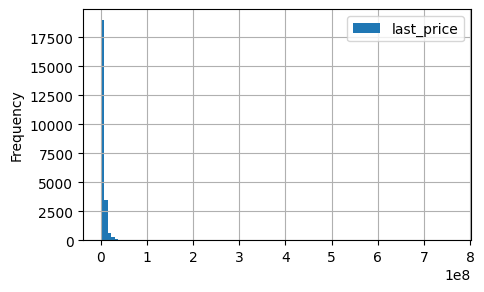

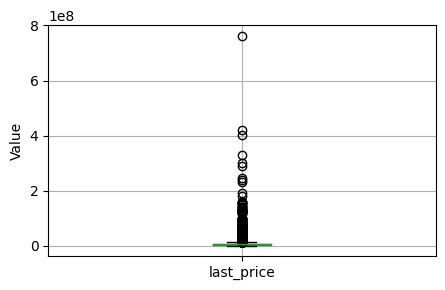

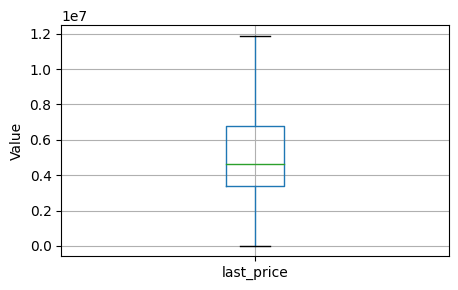

In [70]:
describe_plot('last_price')

Посмотрим на гистограмму значений от 12 тыс. руб. до 20 млн. руб.

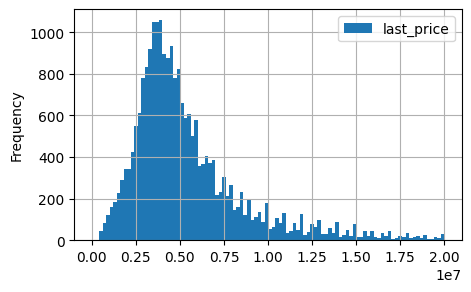

In [71]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (12000,20000000), figsize = (5,3))
plt.show()

У нас имеется 23 613 значений от ~ 12 тыс. до 763 млн. рублей. Это большой разброс. Большая часть значений находится в пределах до 20 млн. руб. Среднее и медиана разнятся: средняя цена составляет ~ 6,5 млн. руб., а медианное значение - 4,6 млн. руб. Стандартное отклонение очень велико: ~ 10,9 млн. руб.

Отсортируем значения столбца `last_price` по возрастанию.

In [72]:
data['last_price'].sort_values()

8765         12,190.00
17388       430,000.00
14849       430,000.00
16211       440,000.00
17607       450,000.00
             ...      
15589   300,000,000.00
1432    330,000,000.00
14645   401,300,000.00
19465   420,000,000.00
12917   763,000,000.00
Name: last_price, Length: 23613, dtype: float64

Выведем строки, где значения `last_price` меньше 450 тыс. руб. и больше 400 млн. руб.

In [73]:
data.query('last_price < 450000 or last_price > 400000000').sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
8765,7,"12,190.00",109.00,2019-03-20,2,2.75,25,32.00,25,False,False,False,40.50,0,Санкт-Петербург,"36,421.00","9,176.00",1.00,805.00,0.00,NaN,8.00
14849,5,"430,000.00",54.00,2018-06-26,2,2.65,3,31.15,3,False,False,False,9.45,0,поселок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.00
17388,7,"430,000.00",30.40,2019-04-22,1,2.65,2,16.00,1,False,False,False,6.00,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16211,18,"440,000.00",40.00,2018-07-10,1,2.65,5,23.08,1,False,False,False,7.00,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.00
14645,15,"401,300,000.00",401.00,2016-02-20,5,2.65,9,204.00,9,False,False,False,24.00,3,Санкт-Петербург,"21,912.00","2,389.00",1.00,545.00,1.00,478.00,393.00
19465,8,"420,000,000.00",900.00,2017-12-06,12,2.80,25,409.70,25,False,False,False,112.00,0,Санкт-Петербург,"30,706.00","7,877.00",0.00,NaN,2.00,318.00,106.00
12917,19,"763,000,000.00",400.00,2017-09-30,7,2.65,10,250.00,10,False,False,False,70.00,2,Санкт-Петербург,"25,108.00","3,956.00",1.00,530.00,3.00,756.00,33.00


Из всех значений больше всего выбиваются значения - 12,190.00 руб. и 763,000,000.00 руб. Возможно при размещении объявлений были допущены ошибки в цене. Т.к. таких выбивающихся значений всего 2, можем удалить их.

In [74]:
data = data[(data['last_price'] != 12190) & (data['last_price'] != 763000000)].reset_index(drop=True)

Проверим количество строк в `data` после удаления.

In [75]:
print('Количество строк в "data":', data.shape[0])

Количество строк в "data": 23611


##### Рассмотрим значения столбца `total_area`

count   23,611.00
mean        60.32
std         35.58
min         12.00
25%         40.00
50%         52.00
75%         69.80
max        900.00
Name: total_area, dtype: float64


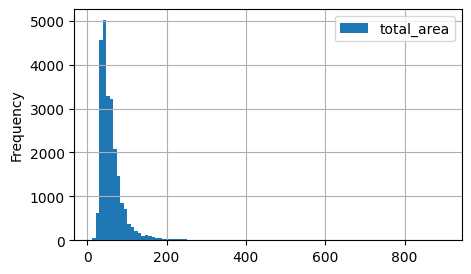

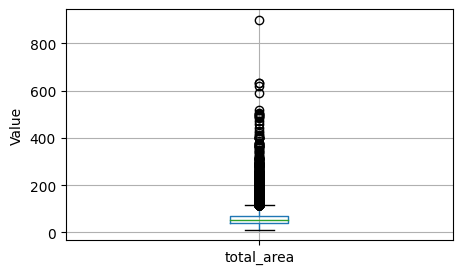

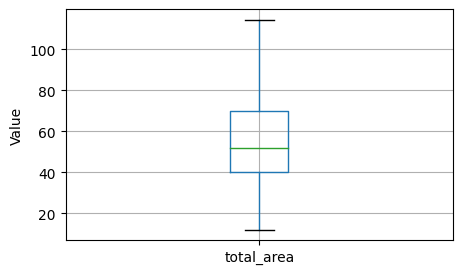

In [76]:
describe_plot('total_area')

У нас имеется 23 611 значений от ~ 12 м2 до 900 м2. Среднее и медиана отличаются не сильно. Большинство объектов недвижимости имеют площадь до 115 м2. 

Посмотрим на самые маленькие объекты площадью меньше 15 м2.

In [77]:
data.query('total_area < 15').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
19827,4,"2,400,000.00",12.00,2017-07-19,1,2.55,5,10.00,2,False,False,False,2.10,0,Санкт-Петербург,"21,314.00",964.00,1.00,886.00,2.00,45.00,200.00
17888,3,"1,400,000.00",13.00,2017-12-03,1,2.60,9,7.50,1,False,False,False,2.27,0,Санкт-Петербург,"14,350.00","15,945.00",0.00,NaN,1.00,185.00,410.00
19469,3,"1,850,000.00",13.00,2019-03-11,1,3.40,5,7.50,2,False,False,False,2.27,0,Санкт-Петербург,"24,915.00","5,483.00",1.00,644.00,0.00,NaN,24.00
19730,0,"3,800,000.00",13.00,2018-07-04,1,2.65,5,10.00,3,False,False,False,2.27,0,Санкт-Петербург,"21,302.00","1,242.00",1.00,592.00,3.00,27.00,9.00
19481,2,"1,686,000.00",13.20,2018-12-17,1,2.65,5,7.62,1,False,False,False,2.31,0,Санкт-Петербург,"19,891.00","4,165.00",1.00,361.00,1.00,155.00,19.00
19565,5,"1,190,000.00",14.00,2018-07-29,1,2.65,5,11.00,1,False,False,False,2.00,0,Санкт-Петербург,"9,898.00","11,122.00",0.00,NaN,0.00,NaN,4.00


Похоже на правду, такие объекты имеют место быть. Небольшие квартиры, комнаты в коммунальных квартирах.

Посмотрим на самые большие объекты площадью более 500 м2.

In [78]:
data.query('total_area > 500').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
7991,20,"84,000,000.00",507.00,2015-12-17,5,4.45,7,301.50,7,True,False,False,45.50,1,Санкт-Петербург,NaN,"5,735.00",2.00,110.00,0.00,NaN,"1,078.00"
4223,1,"50,000,000.00",517.00,2017-10-14,7,2.65,4,332.00,3,False,False,False,22.00,0,Санкт-Петербург,"22,835.00","1,847.00",2.00,477.00,2.00,540.00,NaN
5339,20,"65,000,000.00",590.00,2019-02-14,15,3.50,6,409.00,3,False,False,False,100.00,0,Санкт-Петербург,"24,447.00","4,666.00",1.00,767.00,0.00,NaN,14.00
15587,20,"300,000,000.00",618.00,2017-12-18,7,3.40,7,258.00,5,False,False,False,70.00,0,Санкт-Петербург,"32,440.00","5,297.00",0.00,NaN,2.00,198.00,111.00
3107,19,"140,000,000.00",631.00,2019-03-30,7,2.65,5,364.04,5,False,False,False,60.00,0,Санкт-Петербург,"25,707.00","4,972.00",0.00,NaN,2.00,210.00,NaN
12804,20,"140,000,000.00",631.20,2019-04-09,7,3.90,4,322.30,4,False,False,False,19.50,1,Санкт-Петербург,"25,707.00","4,972.00",0.00,NaN,2.00,210.00,NaN
19463,8,"420,000,000.00",900.00,2017-12-06,12,2.80,25,409.70,25,False,False,False,112.00,0,Санкт-Петербург,"30,706.00","7,877.00",0.00,NaN,2.00,318.00,106.00


Таких объектов немного, данные похожи на правду. Возможно это элитная недвижость, например с большими балконами или террасами.

Общая площадь объекта недвижимости состоит из жилой и нежилой площади (площадь кухни входит в нежилую площадь). Проверим нет ли объектов недвижимости, у которых общая площадь (`total_area`) меньше или равна сумме жилой площади (`living_area`) и площади кухни (`kitchen_area`).

In [79]:
data.query('total_area <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
184,7,"2,600,000.00",30.20,2018-02-14,1,2.65,9,26.10,5,False,False,False,6.20,0,Санкт-Петербург,"13,952.00","15,031.00",0.00,NaN,1.00,824.00,12.00
219,8,"3,890,000.00",37.00,2018-07-09,1,2.50,25,28.00,6,False,False,False,9.00,0,Санкт-Петербург,"25,408.00","16,166.00",0.00,NaN,0.00,NaN,28.00
422,14,"11,500,000.00",98.00,2016-05-10,3,2.65,3,88.00,3,False,False,False,17.15,1,Санкт-Петербург,"39,363.00","13,270.00",0.00,NaN,0.00,NaN,90.00
438,8,"2,480,000.00",27.11,2018-03-12,0,2.65,17,24.75,4,False,True,False,4.74,2,Санкт-Петербург,"38,171.00","15,015.00",0.00,NaN,2.00,982.00,64.00
542,9,"4,700,000.00",23.80,2018-12-28,1,2.65,18,20.00,9,False,False,False,5.00,0,Санкт-Петербург,"9,731.00","11,849.00",0.00,NaN,0.00,NaN,108.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23016,0,"5,800,000.00",66.00,2017-06-09,5,2.65,5,55.50,1,False,False,False,11.55,0,Санкт-Петербург,"12,007.00","11,933.00",0.00,NaN,0.00,NaN,21.00
23105,3,"1,900,000.00",18.90,2016-04-04,1,2.65,16,16.00,12,False,False,False,3.31,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.00
23116,13,"4,919,880.00",67.92,2018-10-23,2,2.65,3,63.00,3,False,False,False,13.04,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.00
23211,10,"1,850,000.00",48.20,2019-03-13,2,2.65,5,42.20,2,False,False,False,6.00,1,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.00


Да, есть такие объекты, где общая площадь меньше суммы жилой площади и площади кухни, всего их 191. Возможно какой-то параметр площади был указан пользователем неверно, что привело в ошибке. Т.к. неверных значений немного, то можем удалить эти строки.

In [80]:
data = data.query('total_area > living_area + kitchen_area').reset_index(drop=True)

Проверим количество строк в data после удаления.

In [81]:
print('Количество строк в "data":', data.shape[0])

Количество строк в "data": 23420


##### Рассмотрим значения столбца `rooms`

count   23,420.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64


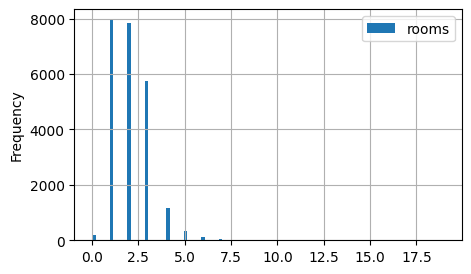

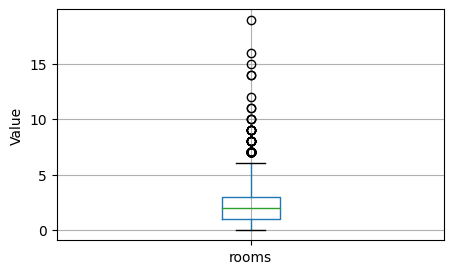

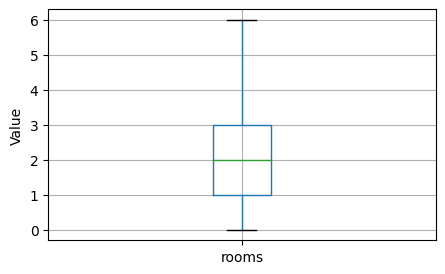

In [82]:
describe_plot('rooms')

У нас имеется 23 420 значений от 1 до 19 комнат. Это относительно небольшой разброс. Среднее и медиана практически не отличаются - равны 2 комнатам. Стандартное отклонение невелико ~ 1. Большая часть значений лежит в диапазоне от 1 до 3 комнат, что действительно соответствует среднестатистическим квартирам, также есть квартиры с большим количеством комнат (до 19 комнат) и количеством комнат - 0. Посмотрим на эти выбивающиеся значения.

Выведем строки датафрейма, где количество комнат более 5.

In [83]:
data.query('rooms > 5').sort_values(by='rooms', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
14311,6,"32,250,000.00",374.60,2018-06-09,19,2.65,5,264.50,2,False,False,False,27.60,0,Санкт-Петербург,"19,497.00","3,574.00",0.00,NaN,2.00,548.00,114.00
18624,6,"28,500,000.00",270.00,2015-03-02,16,3.00,4,180.00,4,False,False,False,13.00,1,Санкт-Петербург,"23,575.00","4,142.00",1.00,516.00,0.00,NaN,"1,365.00"
5297,20,"65,000,000.00",590.00,2019-02-14,15,3.50,6,409.00,3,False,False,False,100.00,0,Санкт-Петербург,"24,447.00","4,666.00",1.00,767.00,0.00,NaN,14.00
854,5,"25,000,000.00",363.00,2017-12-23,14,3.16,5,222.00,4,False,False,False,16.60,0,Санкт-Петербург,"38,076.00","7,950.00",0.00,NaN,2.00,435.00,418.00
20583,6,"28,659,000.00",245.40,2016-03-31,14,2.65,4,168.30,2,False,False,False,25.90,0,Санкт-Петербург,"21,104.00","2,054.00",3.00,541.00,2.00,118.00,95.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9746,13,"12,000,000.00",106.00,2018-07-30,6,2.80,3,70.00,1,False,False,False,15.00,0,Санкт-Петербург,"20,290.00","4,733.00",0.00,NaN,1.00,238.00,NaN
9674,13,"37,900,000.00",220.00,2017-10-23,6,4.50,5,148.00,5,False,False,False,21.00,1,Санкт-Петербург,"32,534.00","4,725.00",0.00,NaN,2.00,594.00,364.00
9371,6,"19,000,000.00",201.00,2015-06-24,6,2.65,6,136.00,2,False,False,False,20.00,0,Санкт-Петербург,"26,995.00","5,698.00",3.00,304.00,1.00,133.00,925.00
9286,3,"19,500,000.00",195.70,2018-02-22,6,3.21,5,150.80,5,False,False,False,17.70,0,Санкт-Петербург,"23,932.00","4,195.00",1.00,500.00,0.00,NaN,125.00


Квартиры с большим количеством комнат имеют большую площадь, так что выглядит правдоподобно.

Выведем строки датафрейма, где количество комнат = 0.

In [84]:
data.query('rooms == 0').sort_values(by='total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
19159,5,"71,000,000.00",371.00,2018-07-26,0,3.57,7,214.04,6,False,False,True,64.92,0,Санкт-Петербург,"25,257.00","6,060.00",1.00,761.00,1.00,584.00,90.00
19843,10,"16,300,000.00",98.40,2017-11-08,0,3.10,5,60.50,2,False,True,False,17.22,0,Санкт-Петербург,"26,972.00","5,819.00",0.00,NaN,1.00,674.00,537.00
3419,6,"7,400,000.00",73.60,2017-05-18,0,2.65,3,50.00,1,False,True,False,12.88,0,Санкт-Петербург,"26,581.00","6,085.00",0.00,NaN,1.00,348.00,60.00
13435,16,"8,100,000.00",58.40,2019-04-26,0,3.30,7,33.00,6,False,True,False,10.22,0,Санкт-Петербург,"14,509.00","8,288.00",0.00,NaN,0.00,NaN,NaN
9895,20,"5,050,000.00",44.20,2017-09-14,0,2.70,9,32.20,1,False,True,False,7.74,0,Санкт-Петербург,"24,329.00","5,955.00",0.00,NaN,2.00,520.00,69.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,8,"2,190,000.00",19.00,2018-10-12,0,3.50,5,15.00,1,False,True,False,3.32,0,Санкт-Петербург,"29,561.00","8,264.00",2.00,383.00,1.00,781.00,89.00
8364,7,"2,250,000.00",19.00,2019-03-12,0,3.00,6,10.96,2,False,True,False,3.32,0,Санкт-Петербург,"12,430.00","7,316.00",1.00,238.00,3.00,374.00,44.00
704,5,"1,500,000.00",17.00,2017-06-07,0,2.70,9,12.00,1,False,True,False,2.97,0,поселок Шушары,"18,654.00","29,846.00",0.00,NaN,0.00,NaN,40.00
9306,5,"2,100,000.00",16.00,2017-12-10,0,2.65,6,13.00,1,False,False,True,2.80,0,Санкт-Петербург,"20,735.00","2,111.00",2.00,228.00,3.00,72.00,3.00


Общая площадь квартир, где указано 0 комнат разная, от 15.50 м2 до 371.00 м2, также указана жилая площадь этих квартир, некоторые квартиры указаны как "студия", а некоторые как квартиры "свободной планировки". Из имеющихся данных можно предположить, что количество комнат 0 было указано скорее всего неверно, за исключением, наверное, квартир "свободной планировки". Таких квартир всего 176, это немного от общей выборки, мы можем их удалить, но лучше оставить, т.к. количество комнат не так важно для нашей задачи и количество таких квартир несильно повлияет на общий результат, а данные из других столбцов могут быть нам полезны.

##### Рассмотрим значения столбца `ceiling_height`

count   23,420.00
mean         2.72
std          0.73
min          1.00
25%          2.60
50%          2.65
75%          2.70
max         32.00
Name: ceiling_height, dtype: float64


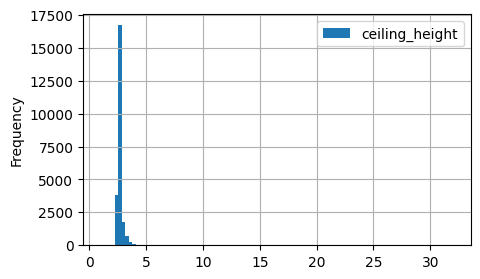

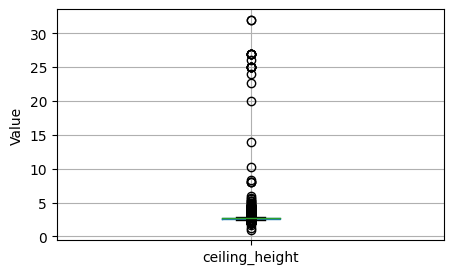

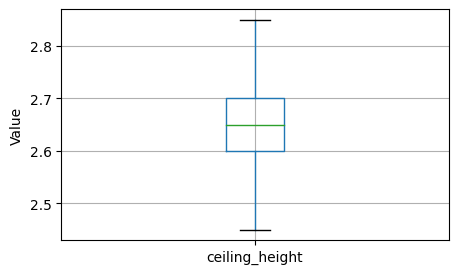

In [85]:
describe_plot('ceiling_height')

Разброс значений высоты потолков от 1 до 32 м. Среднее и медиана отличаются незначительно. Большинство значений лежит в диапазоне от 2.45 до 2.85 м. На диаграмме размаха видны выбросы, это очень низкие и очень высокие потолки. Выведем строки с выбивающимися значениями, где высота потолком меньше 2-х метров или больше 8-ми метров.

In [86]:
data.query('ceiling_height < 2 or ceiling_height > 8').sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
22324,16,"6,000,000.00",55.00,2018-10-31,2,1.00,12,32.40,7,False,False,False,10.00,0,Санкт-Петербург,"33,053.00","14,217.00",2.00,293.00,2.00,289.00,13.00
5649,5,"1,500,000.00",42.80,2017-08-14,2,1.20,2,27.50,1,False,False,False,5.20,0,поселок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.00
16725,5,"4,100,000.00",40.00,2017-10-17,1,1.75,37,17.40,5,False,False,False,8.34,0,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,71.00
5799,20,"5,650,000.00",45.00,2018-08-15,1,8.30,16,19.30,14,False,False,False,8.30,1,Санкт-Петербург,"13,069.00","10,763.00",0.00,NaN,1.00,613.00,14.00
22045,20,"5,300,000.00",45.00,2017-09-30,1,10.30,16,15.50,15,False,False,False,7.87,0,Санкт-Петербург,"36,353.00","11,936.00",2.00,440.00,2.00,450.00,136.00
14870,19,"5,600,000.00",56.40,2018-05-11,2,14.00,14,32.40,5,False,False,False,9.10,2,Санкт-Петербург,"14,814.00","13,610.00",0.00,NaN,0.00,NaN,315.00
17283,15,"6,700,000.00",92.90,2019-02-19,3,20.00,17,53.20,14,False,False,False,12.00,5,Санкт-Петербург,"16,295.00","15,092.00",1.00,967.00,0.00,NaN,NaN
20262,12,"5,950,000.00",60.00,2018-02-19,2,22.60,14,35.00,11,False,False,False,13.00,1,Санкт-Петербург,"27,028.00","12,570.00",0.00,NaN,0.00,NaN,40.00
5021,0,"3,850,000.00",30.50,2018-10-03,1,24.00,5,19.50,1,True,False,False,5.50,0,Санкт-Петербург,"29,686.00","8,389.00",3.00,397.00,1.00,578.00,7.00
14195,9,"1,700,000.00",35.00,2015-12-04,1,25.00,5,20.00,2,False,False,False,8.00,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.00


Высота потолков ниже 2-х метров кажется подозрительной и похожа на ошибку, да это может быть высота подвала или чердака, но по данным видно, что такие квартиры имеют 1-2 комнаты и общую площадь 40-55 м2, и скорее всего высота потолков в этих жилых помещениях другая. Т.к. таких квартир немного, мы можем удалить эти строки. Тоже самое можно сказать и об квартирах с потолками выше 8-ми метров, можем предположить, что в двухэтажных квартирах могут быть потолки до 8 метров, всё что выше похоже на ошибку. Однако, если рассмотреть варианты квартир с высотой потолков от 20 до 32 метров, то тут ошибка может быть связана с неверно поставленной точкой в значении высоты потолка, т.е. 20 метров - это 2.0 м, а 32 метра на самом деле - 3.2 м. 

Удалим строки датафрейма, где высота потолков < 2-х метров.

In [87]:
data = data.query('ceiling_height >= 2').reset_index(drop=True)

Удалим строки датафрейма, где высота потолков > 8 метров, но меньше 20 метров.

In [88]:
data = data.query('ceiling_height <= 8 or ceiling_height >= 20').reset_index(drop=True)

Проверим количество строк в `data` после удаления.

In [89]:
print('Количество строк в "data":', data.shape[0])

Количество строк в "data": 23414


Разделим высоту потолков на 10 в квартирах, где высота потолков 20-32 метра. 

In [90]:
data.loc[(data['ceiling_height'] >= 20), 'ceiling_height'] = data['ceiling_height'] / 10

Выведем обновленную информацию по столбцу `ceiling_height`.

In [91]:
data['ceiling_height'].describe()

count   23,414.00
mean         2.70
std          0.23
min          2.00
25%          2.60
50%          2.65
75%          2.70
max          8.00
Name: ceiling_height, dtype: float64

Теперь у нас минимальная высота потолков - 2 метра, максимальная - 8 метров, средняя и медиана практически одинаковы. Аномальные значения были удалены, либо замены на более реальные.

##### Рассмотрим значения столбца `floors_total`

count   23,414.00
mean        10.66
std          6.58
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64


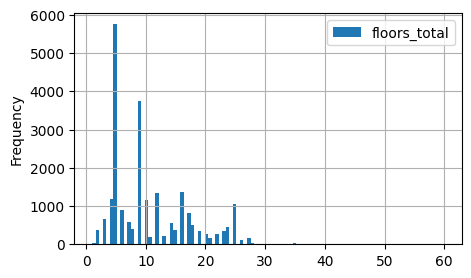

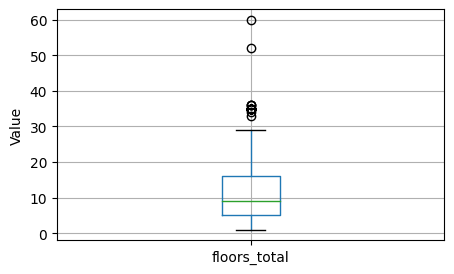

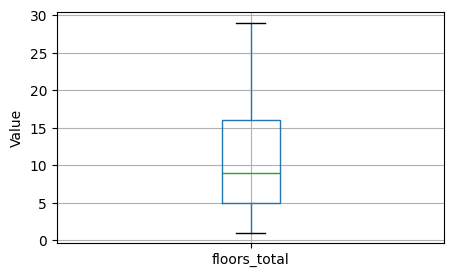

In [92]:
describe_plot('floors_total')

Большая часть домов не выше 30 этажей. По информации из открытых источников интернет этажность домой в Санкт-Петербурге и области - 8-27 этажей. Самый высокий жилой дом в Санкт-Петербурге - 36 этажей, но в тоже время есть и 87-этажный небоскрёб - Лахта центр. Выведем строки со значением этажей больше 36. 

In [93]:
data.query('floors_total > 36')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
2230,12,"3,800,000.00",45.50,2018-06-28,2,2.88,60,27.40,4,False,False,False,7.40,0,Кронштадт,"67,763.00","49,488.00",2.00,342.00,3.00,614.00,166.00
16522,9,"3,978,000.00",40.00,2018-09-24,1,2.65,52,10.50,18,False,False,False,14.00,0,Санкт-Петербург,"20,728.00","12,978.00",1.00,793.00,0.00,NaN,45.00


Строку со значением `floors_total` - 60 этажей можно удалить, т.к. это похоже на ошибку, этажность домов в Кронштадте - 5-15 этажей. А вот строку со значением `floors_total` - 52 можно оставить, по расстоянию до аэропорта и центра это похоже на недвижимость в 87-ми этажном Лахта центре.

Удалим строку со значением `floors_total` - 60 этажей.

In [94]:
data = data.query('floors_total != 60').reset_index(drop=True)

Проверим количество строк в `data` после удаления.

In [95]:
print('Количество строк в "data":', data.shape[0])

Количество строк в "data": 23413


Выведем обновленную информацию по столбцу `floors_total`.

In [96]:
data['floors_total'].describe()

count   23,413.00
mean        10.66
std          6.58
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         52.00
Name: floors_total, dtype: float64

Теперь максимальное значение этажей в доме - 52, среднее, медиана и стандартное отклонение не изменились.

##### Рассмотрим информацию по столбцу `living_area`

count   23,413.00
mean        34.57
std         22.30
min          2.00
25%         19.00
50%         30.00
75%         42.10
max        409.70
Name: living_area, dtype: float64


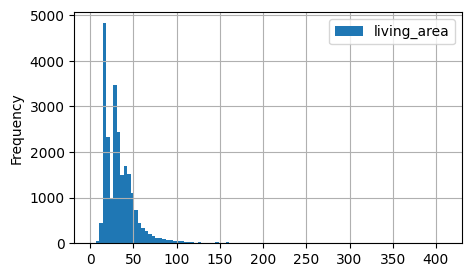

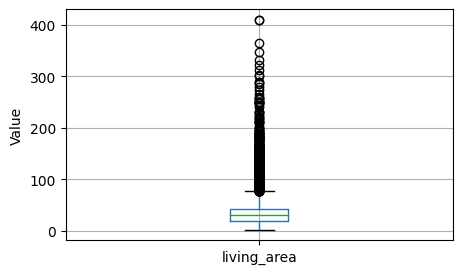

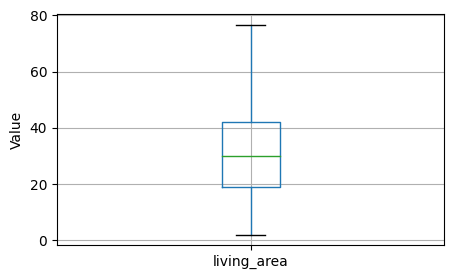

In [97]:
describe_plot('living_area')

У нас имеется 23 413 значений от ~ 2 до 409.70 м2. Больше всего объявлений с квартирами с жилой площадью около 20 м2. Среднее и медиана отличаются не сильно. Большинство объектов недвижимости имеют жилую площадь до 80 м2. 

Есть квартиры с очень маленькой жилой площадью (например, 2 м2), что кажется неправдоподобным. Допустим общая площадь самой маленькой квартиры может быть 10-12 м2, то жилая площадь может составить ~ 7 м2. Посмотрим на квартиры с жилой площадью меньше 7 м2.

In [98]:
data.query('living_area < 7').sort_values(by='living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
13730,20,"6,350,000.00",52.00,2018-02-06,2,3.00,6,2.00,2,False,False,False,9.00,0,Санкт-Петербург,"32,453.00","6,521.00",0.00,NaN,1.00,"1,012.00",91.00
21498,0,"2,330,000.00",23.00,2018-01-01,0,2.65,24,2.00,22,False,True,False,4.02,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.00
3204,7,"4,440,000.00",41.00,2017-07-02,1,2.65,17,3.00,17,False,False,False,11.00,0,Санкт-Петербург,"19,272.00","13,073.00",0.00,NaN,0.00,NaN,216.00
23291,14,"64,990,000.00",139.00,2015-11-24,3,3.00,8,3.00,8,False,False,False,16.00,1,Санкт-Петербург,"33,255.00","5,975.00",1.00,630.00,3.00,100.00,280.00
17362,11,"2,680,000.00",22.00,2018-08-11,0,2.65,25,5.00,8,False,True,False,3.85,2,Санкт-Петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,70.00
21679,15,"6,100,000.00",77.60,2019-02-28,4,2.50,9,5.40,1,False,False,False,9.80,0,Санкт-Петербург,"29,338.00","11,270.00",1.00,584.00,0.00,NaN,33.00
16228,13,"3,799,000.00",31.00,2018-04-12,1,2.60,5,6.00,1,False,False,False,17.00,0,Санкт-Петербург,"32,177.00","4,826.00",1.00,430.00,0.00,NaN,168.00
19018,19,"4,050,000.00",33.00,2018-10-15,1,2.50,22,6.50,21,False,False,False,18.00,0,Санкт-Петербург,"9,258.00","10,592.00",1.00,458.00,0.00,NaN,44.00


По полученным данным видно, что в некоторых квартирах при небольшой жилой площади, большая площадь кухни и общая площадь, это могут быть квартиры с кухней-гостиной, например. Но есть и квартиры, где маленкая жилая площадь и площадь кухни, а общая площадь большая, в этих строках скоре всего неверно были внесены данные по площадям квартиры. Можем удалить строки, где жилая площадь квартиры меньше 6 м2.

Удалим строки, где жилая площадь квартиры меньше 6 м2.

In [99]:
data = data.query('living_area >= 6').reset_index(drop=True)

Проверим количество строк в data после удаления.

In [100]:
print('Количество строк в "data":', data.shape[0])

Количество строк в "data": 23407


Рассмотрим квартиры с жилой площадью более 200 м2.

In [101]:
data.query('living_area > 300').sort_values(by='living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
7927,20,"84,000,000.00",507.00,2015-12-17,5,4.45,7,301.50,7,True,False,False,45.50,1,Санкт-Петербург,NaN,"5,735.00",2.00,110.00,0.00,NaN,"1,078.00"
650,3,"49,950,000.00",483.90,2017-10-04,7,3.20,6,312.50,4,False,False,False,26.40,0,Санкт-Петербург,"23,079.00",945.00,3.00,461.00,3.00,22.00,391.00
12686,20,"140,000,000.00",631.20,2019-04-09,7,3.90,4,322.30,4,False,False,False,19.50,1,Санкт-Петербург,"25,707.00","4,972.00",0.00,NaN,2.00,210.00,NaN
4190,1,"50,000,000.00",517.00,2017-10-14,7,2.65,4,332.00,3,False,False,False,22.00,0,Санкт-Петербург,"22,835.00","1,847.00",2.00,477.00,2.00,540.00,NaN
12239,20,"91,500,000.00",495.00,2017-06-19,7,4.65,7,347.50,7,False,False,False,25.00,0,Санкт-Петербург,NaN,"5,735.00",2.00,110.00,0.00,NaN,14.00
3080,19,"140,000,000.00",631.00,2019-03-30,7,2.65,5,364.04,5,False,False,False,60.00,0,Санкт-Петербург,"25,707.00","4,972.00",0.00,NaN,2.00,210.00,NaN
5295,20,"65,000,000.00",590.00,2019-02-14,15,3.50,6,409.00,3,False,False,False,100.00,0,Санкт-Петербург,"24,447.00","4,666.00",1.00,767.00,0.00,NaN,14.00
19297,8,"420,000,000.00",900.00,2017-12-06,12,2.80,25,409.70,25,False,False,False,112.00,0,Санкт-Петербург,"30,706.00","7,877.00",0.00,NaN,2.00,318.00,106.00


Квартиры с большой жилой площадью имеют большую площадь кухни и большую общую площадь, много комнат, в целом всё похоже на правду.

##### Рассмотрим информацию по столбцу `kitchen_area`

count   23,407.00
mean        10.47
std          5.98
min          1.30
25%          7.00
50%          9.00
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64


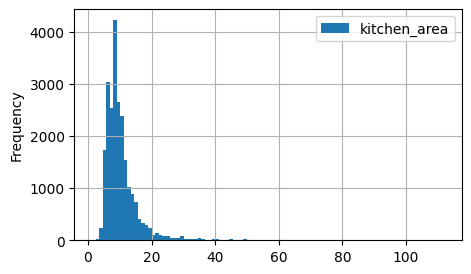

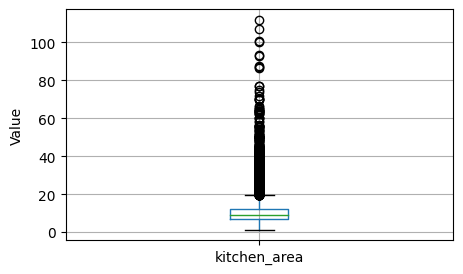

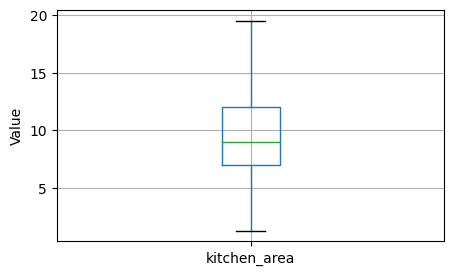

In [102]:
describe_plot('kitchen_area')

У нас имеется 23 407 значений от ~ 1.3 до 112.0 м2. Больше всего объявлений с квартирами c площадью кухни 6-12 м2. Среднее и медиана отличаются не сильно. Большинство квартир имеют кухню площадью до 20 м2. Также есть квартиры с очень маленькой площадью кухни (например, 1.3 м2), что кажется неправдоподобным.

Выведем данные квартир с площадью кухни менее 4 м2.

In [103]:
data.query('kitchen_area < 4').sort_values(by='kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
19968,7,"4,250,000.00",28.50,2019-05-01,1,2.80,14,19.50,10,False,False,False,1.30,0,Санкт-Петербург,"37,199.00","12,721.00",0.00,NaN,0.00,NaN,NaN
10893,6,"5,350,000.00",32.00,2016-04-20,1,2.65,14,16.00,10,False,False,False,2.00,0,Санкт-Петербург,"19,008.00","3,953.00",0.00,NaN,1.00,69.00,210.00
16162,2,"2,720,000.00",25.70,2017-10-30,1,2.65,19,22.60,11,False,False,False,2.00,0,Санкт-Петербург,"14,472.00","13,268.00",0.00,NaN,0.00,NaN,109.00
9031,17,"2,920,000.00",23.29,2018-12-12,1,2.65,3,21.00,1,False,False,False,2.00,0,Санкт-Петербург,"19,506.00","4,008.00",0.00,NaN,2.00,45.00,107.00
19399,5,"1,190,000.00",14.00,2018-07-29,1,2.65,5,11.00,1,False,False,False,2.00,0,Санкт-Петербург,"9,898.00","11,122.00",0.00,NaN,0.00,NaN,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17871,4,"965,780.00",22.50,2017-05-10,1,2.65,3,12.98,1,False,False,False,3.94,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,46.00
3727,2,"2,050,000.00",22.50,2017-07-12,1,2.65,24,15.50,5,False,False,False,3.94,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,44.00
2746,12,"2,450,000.00",22.70,2018-01-10,1,2.65,10,13.80,5,False,False,False,3.97,0,Санкт-Петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,89.00
1180,14,"2,520,000.00",22.70,2018-08-31,1,2.65,14,13.50,5,False,False,False,3.97,0,Санкт-Петербург,"22,735.00","11,907.00",1.00,"1,065.00",1.00,484.00,7.00


В целом часть данных похоже на правду для маленьких квартир. Но в строках, где площадь кухни < 4 м2, есть и квартиры с большой жилой и общей площадью, что означает, что скорее всего данные были внесены с ошибками. Количество таких квартир незначительное по сравнению с выборкой, оставим данные как есть.

Выведем данные квартир с площадью кухни более 80 м2.

In [104]:
data.query('kitchen_area > 80').sort_values(by='kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
9713,1,"43,185,328.00",494.10,2017-05-12,1,2.85,12,285.06,3,False,False,False,86.47,0,Санкт-Петербург,"28,529.00","6,832.00",1.00,592.00,0.00,NaN,5.00
10731,1,"56,844,500.00",177.90,2015-01-15,3,2.65,6,87.20,5,True,False,False,87.20,0,Санкт-Петербург,"21,860.00",318.00,2.00,160.00,3.00,569.00,NaN
14821,8,"150,000,000.00",500.00,2016-01-13,4,3.20,7,288.46,7,False,False,False,87.50,0,Санкт-Петербург,"33,058.00","6,150.00",3.00,209.00,3.00,531.00,303.00
16584,9,"65,850,000.00",146.00,2017-07-14,2,2.65,9,40.00,3,False,False,False,93.00,0,Санкт-Петербург,"25,525.00","5,845.00",2.00,116.00,0.00,NaN,77.00
16035,5,"82,400,000.00",181.10,2017-05-24,3,3.90,9,58.20,4,False,False,False,93.20,0,Санкт-Петербург,"25,525.00","5,845.00",2.00,116.00,0.00,NaN,501.00
5295,20,"65,000,000.00",590.00,2019-02-14,15,3.50,6,409.00,3,False,False,False,100.00,0,Санкт-Петербург,"24,447.00","4,666.00",1.00,767.00,0.00,NaN,14.00
2463,9,"12,500,000.00",255.00,2017-04-21,3,2.65,2,153.90,2,False,False,False,100.70,0,Санкт-Петербург,"29,544.00","6,916.00",0.00,NaN,3.00,198.00,102.00
19966,2,"85,000,000.00",249.70,2018-02-01,3,2.65,10,72.00,9,False,False,False,107.00,4,Санкт-Петербург,"31,532.00","4,624.00",1.00,"2,218.00",2.00,99.00,26.00
19297,8,"420,000,000.00",900.00,2017-12-06,12,2.80,25,409.70,25,False,False,False,112.00,0,Санкт-Петербург,"30,706.00","7,877.00",0.00,NaN,2.00,318.00,106.00


Данные похожи на правду. У квартир с большой кухней большая жилая и общая площадь.

##### Рассмотрим информацию по столбцу `balcony`

count   23,407.00
mean         0.59
std          0.96
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          5.00
Name: balcony, dtype: float64


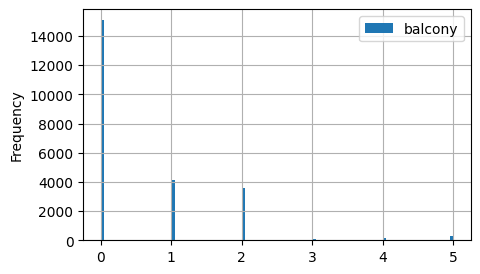

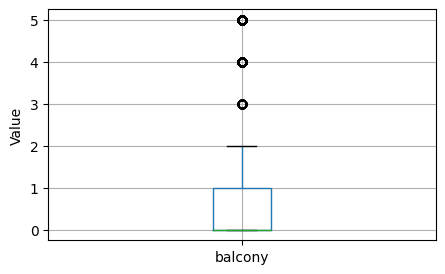

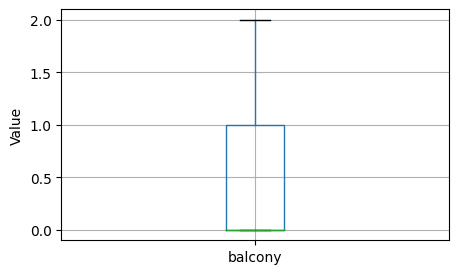

In [105]:
describe_plot('balcony')

У нас имеется 23 407 значений от 0 до 5 балконов. Больше всего объявлений с квартирами без балконов. Из квартир с балконами больше всего объектов с 1-2 балконом. Также есть квартиры с 4 и 5 балконами.

Выведем строки с квартирами с 5 балконами.

In [106]:
data.query('balcony > 4').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
7841,10,"2,888,000.00",30.20,2016-11-09,1,2.53,9,15.00,2,False,False,False,8.00,5,Санкт-Петербург,"32,524.00","9,601.00",0.00,NaN,0.00,NaN,675.00
13465,8,"3,300,000.00",35.00,2018-09-21,1,2.70,16,15.00,14,False,False,False,9.00,5,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,162.00
11433,5,"3,445,000.00",35.95,2018-08-28,1,2.55,22,20.74,19,False,False,False,9.65,5,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,239.00
20634,4,"3,200,000.00",37.00,2017-11-26,1,2.65,14,16.00,5,False,False,False,11.00,5,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,22.00
7032,16,"4,725,000.00",40.40,2017-11-10,1,2.70,15,18.80,6,False,False,False,11.20,5,Санкт-Петербург,"18,119.00","13,347.00",0.00,NaN,0.00,NaN,74.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23261,5,"19,600,000.00",184.00,2016-04-21,3,3.00,19,55.70,19,False,False,False,24.50,5,Санкт-Петербург,"18,995.00","4,837.00",0.00,NaN,0.00,NaN,205.00
6433,9,"30,000,000.00",198.90,2017-11-08,5,3.10,20,109.00,16,False,False,False,23.00,5,Санкт-Петербург,"10,015.00","10,263.00",2.00,587.00,0.00,NaN,524.00
21565,17,"21,900,000.00",220.00,2016-05-04,5,2.65,4,110.00,4,False,False,False,17.00,5,Санкт-Петербург,"37,322.00","12,219.00",1.00,739.00,2.00,752.00,125.00
10552,6,"32,894,076.00",364.70,2019-05-02,7,3.32,3,210.40,1,False,False,False,63.82,5,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Из данных видно, что площадь квартир с 5 балкона разная, если это небольшая квартира 30-40 м2, то скорее всего данные о 5 балконах в такой квартире внесены ошибочно, и наоборот квартира с большой площадью и большим количеством комнат может иметь 5 балконов.
Т.к. маленьких квартир с большим количеством балконов немного и данные по балконам нам не понадобятся для решения наших задач, то оставим их без изменений.

##### Рассмотрим информацию по столбцу `days_exposition`

count   20,257.00
mean       181.30
std        220.02
min          1.00
25%         45.00
50%         96.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64


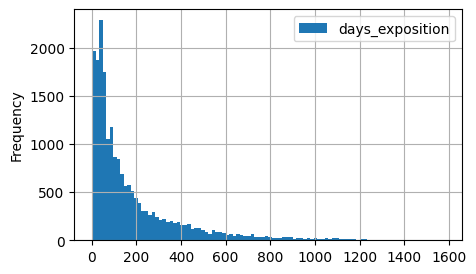

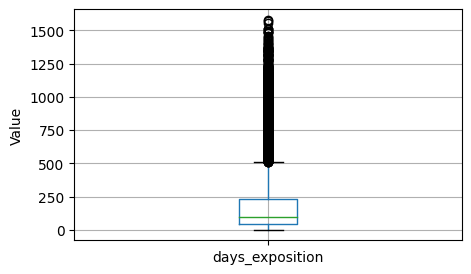

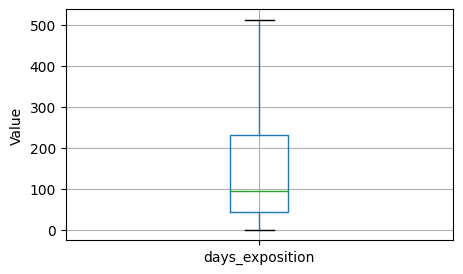

In [107]:
describe_plot('days_exposition')

По данным столбца видим, что миниальное количество дней размещения объявления (от публикации до снятия) - 1 день, максимальное количество дней размещения объявления - 1580 дней (более 4-х лет). Больше всего объявлений размещается не более 45-50 дней.

**Выводы**

Предобработка обнаружила три проблемы в данных:
*   нарушения в стиле заголовков
*   пропущенные значения
*   неявные дубликаты.  

Мы исправили заголовки, чтобы упростить работу с таблицей. Пропущенные значения заполнили, где это было возможным. Устранили неявные дубликаты, без дубликатов исследование станет более точным.  Изменили тип данных в столбцах с датой и целочисленными значения (кроме столбцов, где остались пропуски). Устранили редкие и выбивающиеся значения, природа аномалии которых понятна.

In [108]:
# выведем % удалённых данных
print(f'Всего было удалено {100 - data.shape[0] / old_data.shape[0] * 100} % данных датафрейма.')

Всего было удалено 1.2321194987130184 % данных датафрейма.


### Посчитаем и добавим в таблицу новые столбцы

#### Рассчитаем цену одного квадратного метра и добавим новый столбец `sq_meter_price` в таблицу

In [109]:
data['sq_meter_price'] = data['last_price'] / data['total_area']

#### Добавим в таблицу столбец `weekday_publication` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [110]:
data['weekday_publication'] = data['first_day_exposition'].dt.weekday

#### Добавим в таблицу столбец `month_publication` - месяц публикации объявления

In [111]:
data['month_publication'] = data['first_day_exposition'].dt.month

#### Добавим в таблицу столбец `year_publication` - год публикации объявления

In [112]:
data['year_publication'] = data['first_day_exposition'].dt.year

#### Добавим столбец `floor_category` - тип этажа квартиры (значения — «первый», «последний», «другой»)

Напишем функцию, с помощью которой категоризируем этажи в объявлениях на 3 категории.

In [113]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

data['floor_category'] = data.apply(floor_category, axis = 1)

#### Добавим столбец `city_center_distance` расстояние до центра города в километрах (переведём из м в км и округлим до целых значений)

In [114]:
data['city_center_distance'] = (data['city_centers_nearest'] / 1000).round()

Проверим добавились ли новые столбцы, выведем первые 5 строк таблицы и информацию о датафрейме `data`.

In [115]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,sq_meter_price,weekday_publication,month_publication,year_publication,floor_category,city_center_distance
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",3,3,2019,другой,16.00
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",1,12,2018,первый,19.00
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",3,8,2015,другой,14.00
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,91.73,9,False,False,False,27.82,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",4,7,2015,другой,7.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",1,6,2018,другой,8.00


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23407 entries, 0 to 23406
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23407 non-null  int64         
 1   last_price            23407 non-null  float64       
 2   total_area            23407 non-null  float64       
 3   first_day_exposition  23407 non-null  datetime64[ns]
 4   rooms                 23407 non-null  int64         
 5   ceiling_height        23407 non-null  float64       
 6   floors_total          23407 non-null  int32         
 7   living_area           23407 non-null  float64       
 8   floor                 23407 non-null  int64         
 9   is_apartment          23407 non-null  bool          
 10  studio                23407 non-null  bool          
 11  open_plan             23407 non-null  bool          
 12  kitchen_area          23407 non-null  float64       
 13  balcony         

Да, новые столбцы есть. Всего в таблице 28 столбцов, 23407 записей.

### Исследовательский анализ данных

#### Изучим следующие параметры объектов:
    *	общая площадь
    *	жилая площадь
    *	площадь кухни
    *	цена объекта
    *	количество комнат
    *	высота потолков
    *	этаж квартиры
    *	тип этажа квартиры («первый», «последний», «другой»)
    *	общее количество этажей в доме
    *	расстояние до центра города в метрах
    *	расстояние до ближайшего аэропорта
    *	расстояние до ближайшего парка
    *	день и месяц публикации объявления  

Построим отдельные гистограммы для каждого из этих параметров, для этого напишем функцию `histogram`.

In [117]:
def histogram(column):
    data.plot(y =column, kind ='hist', bins =100, grid=True, range = (data[column].min(), data[column].max()), figsize = (5,3))
    plt.show()

##### Гистограмма `общая площадь`

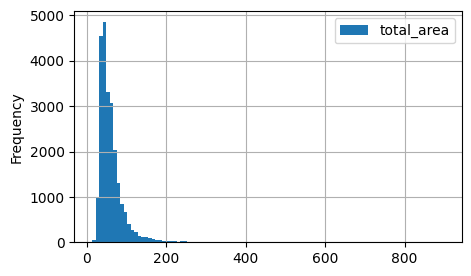

In [118]:
histogram('total_area')

Построим гистограмму распределения общей площади в диапазоне до 200 м2.

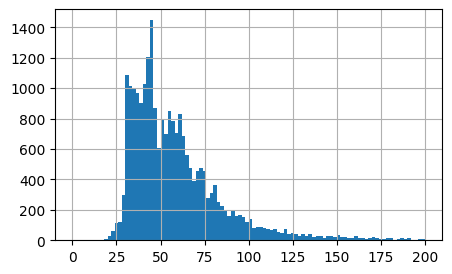

In [119]:
data['total_area'].hist(range=(0, 200),figsize=(5,3), bins=100)
plt.show()

На гистограмме видно, что больше всего квартир площадью 30-45 м2. Есть и небольшие квартиры площадью менее 20 м2 и очень большие квартиры площадью более 200 м2, но их не так много. Основной диапазон площадей квартир - 20-200 м2. Количество квартир с большими площадями, начинает обратнопропорционально убывать - чем больше площадь, тем квартир меньше. График похож на распределение Пуассона.

##### Гистограмма: `жилая площадь`

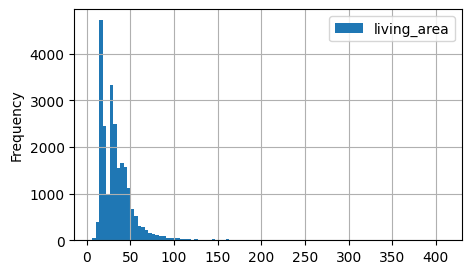

In [120]:
histogram('living_area')

Построим гистограмму распределения жилой площади в диапазоне до 100 м2.

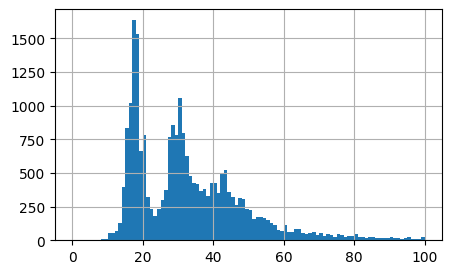

In [121]:
data['living_area'].hist(range=(0, 100),figsize=(5,3), bins=100)
plt.show()

На гистограмме видно, несколько пиков, больше всего квартир с жилой площадью 17-18 м2, на втором месте с жилой площадью 30 м2, на третьем месте с жилой площадью - 42 м2. Возможно это связано с комнатностью квартир - одна-, двух-, трёхкомнатные. Если не учитывать провал в районе 22 м2, то с ростом жилой площади, количество квартир убывает обратно пропорционально. График похож на распределение Пуассона.

##### Гистограмма: `площадь кухни`

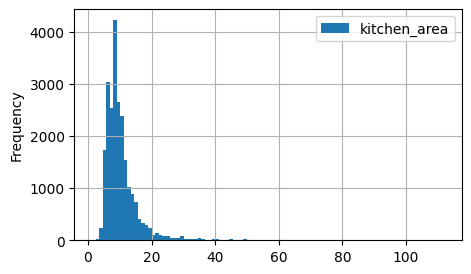

In [122]:
histogram('kitchen_area')

Построим гистограмму распределения площади кухни в диапазоне до 40 м2.

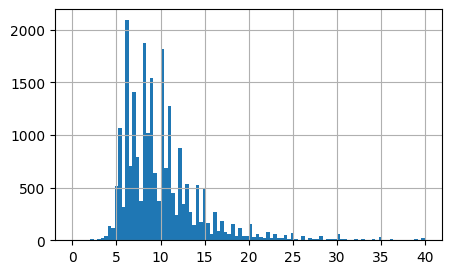

In [123]:
data['kitchen_area'].hist(range=(0, 40),figsize=(5,3), bins=100)
plt.show()

На гистограмме видно, много пиков, больше всего квартир с площадью кухни 6 м2, немного меньше квартир с площадью 8 и 10 м2. С ростом площади кухни, количество квартир убывает обратно пропорционально. График похож на распределение Пуассона.

##### Гистограмма: `цена объекта`

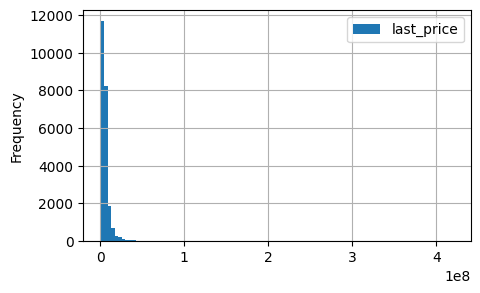

In [124]:
histogram('last_price')

Построим гистограмму распределения цены объекта в диапазоне до 15 млн. руб.

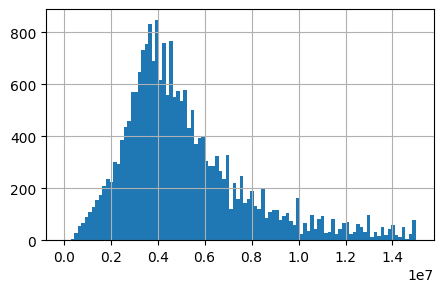

In [125]:
data['last_price'].hist(range=(0, 15000000),figsize=(5,3), bins=100)
plt.show()

Разделим все значения в столбце last_price на 1 млн и выведем гистограмму.

In [126]:
data['last_price'] = data['last_price'] / 1000000

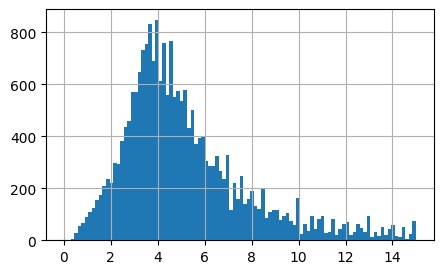

In [127]:
data['last_price'].hist(range=(0, 15),figsize=(5,3), bins=100)
plt.show()

На гистограмме видно, что больше всего квартир продаются по цене в диапазоне 2-7 млн.руб. Больше всего квартир продано по цене  ~ 3,8 млн. Далее выше цена, тем меньше количество проданных квартир. График похож на распределение Пуассона.

##### Гистограмма: `количество комнат`

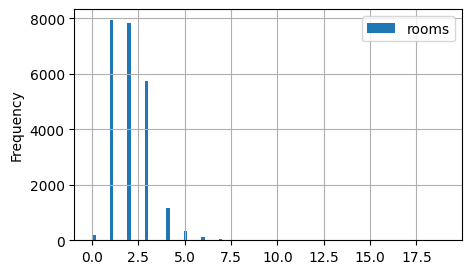

In [128]:
histogram('rooms')

На гистограмме видно, что самые популярные квартиры - 1-комнатные и чуть менее популярные 2-х комнатные, но разница незначительная. Далее по популярности идут 3-х комнатные квартиры, 4-х комнатные и 5-ти комнатные значительно менее популярные, чем 3-х комнатные. Популярность квартир с более 5-ю комната сильно уменьшается. Видна зависимость - чем больше комнат, тем меньше таких квартир. График похож на распределение Пуассона.

##### Гистограмма: `высота потолков`

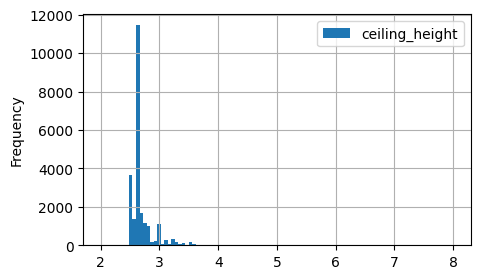

In [129]:
histogram('ceiling_height')

Построим гистограмму распределения высоты потолков в диапазоне от 2-х до 4-х метров.

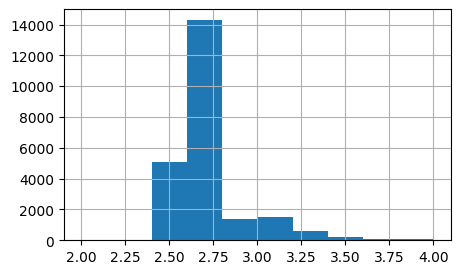

In [130]:
data['ceiling_height'].hist(range=(2, 4),figsize=(5,3))
plt.show()

На гистограмме видно, что больше всего квартир с высотой потолков 2,5 - 2,8 м. Больше всего квартир с высотой потолка - 2,65 м, далее идут квартиры с высотой потолков - 2,5 м, потом с высотой 2,6 м и 2,7 м, но их уже в несколько раз меньше. Далее чем выше высота потолка, тем меньше таких квартир. График вполне похож на распределение Пуассона.

##### Гистограмма: `этаж квартиры`

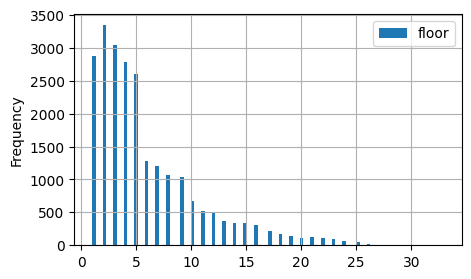

In [131]:
histogram('floor')

На гистограмме видно, что в объявлениях больше всего квартир на 2-м этаже, немного меньше квартир на 3-м, 1-м, 4-м и 5-х этажах. Далее с увеличением этажа квартиры, количество таких объявлений резко падает. График похож на распределение Пуассона. 

##### Гистограмма: `тип этажа квартиры («первый», «последний», «другой»)`

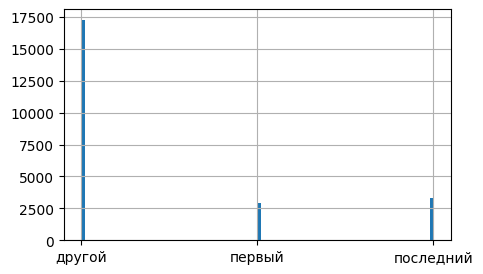

In [132]:
data['floor_category'].hist(range=(0, 2),figsize=(5,3), bins=100)
plt.show()

На гистограмме видно, что больше всего квартир категории: "другой" - это квартиры на всех этажах, кроме первого и последнего.
Квартир на первом и последнем этаже примерно в 5 раз меньше, чем квартир категории "другой".

##### Гистограмма: `общее количество этажей в доме`

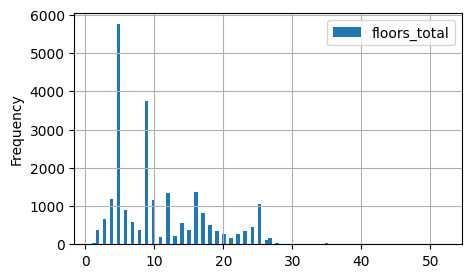

In [133]:
histogram('floors_total')

На графике видно, что больше всего объявлений с квартирами в пятиэтажных домах, в 1,5 раза меньше квартир в девятиэтажных домах. Менее популярные квартиры в домах с этажностью - 16, 12, 4, 10, 25. Остальные варинаты встречаютя ещё реже.

##### Гистограмма: `расстояние до центра города в метрах`

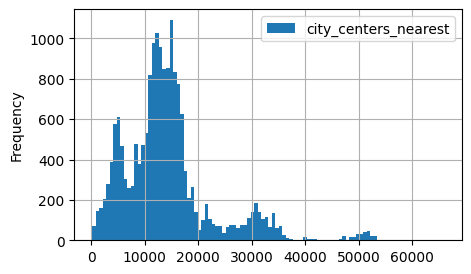

In [134]:
histogram('city_centers_nearest')

На гистограмме видно, несколько пиков, около значений 15 000 и 5 000 м. Большинство квартир находится на расстоянии до 36 000 м (36 км) от центра. С удалением от центра более чем на 15 км, количество квартир начинает резко падать. Распределение на графике похоже на распределение Пуассона.

##### Гистограмма: `расстояние до ближайшего аэропорта`

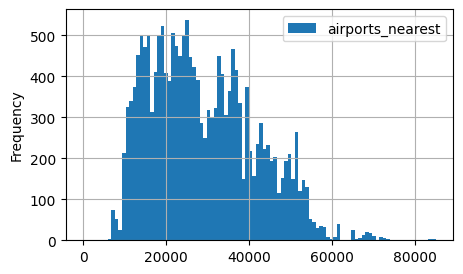

In [135]:
histogram('airports_nearest')

На гистограмме видно, много пиков, больше всего квартир находится на расстоянии ~ 22 000 м (22 км) от ближайшего аэропорта,  большинство квартир находится на расстоянии от 10 000 м (10 км) до 58 000 м (58 км) от ближайшего аэропорта. С удалением от аэропорта более чем на 22 км, количество квартир начинает падать. Распределение на графике похоже на распределение Пуассона.

##### Гистограмма: `расстояние до ближайшего парка`

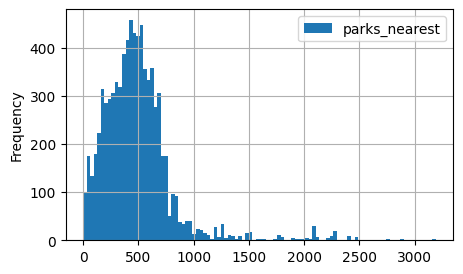

In [136]:
histogram('parks_nearest')

На гистограмме видно, что больше всего квартир находится на расстоянии ~ 450 м от ближайшего парка, большинство квартир находится на расстоянии до 1000 м от ближайшего парка. С удалением от парка более чем на 550 м количество квартир начинает резко падать. Распределение на графике похоже на распределение Пуассона.

##### Гистограмма: `день публикации объявления`

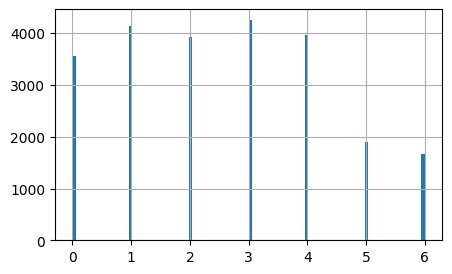

In [137]:
data['weekday_publication'].hist(range=(0, 6),figsize=(5,3), bins=100)
plt.show()

На графике видно, что больше всего объявлений было опубликовано в четверг, на втором месте - вторник, на третьем - пятница и среда, но разница в количестве публикаций между эти днями недели незначительная, меньше всего объявлений было опубликовано в воскресенье и субботу.

##### Гистограмма: `месяц публикации объявления`

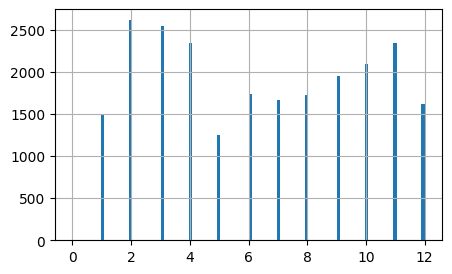

In [138]:
data['month_publication'].hist(range=(0, 12),figsize=(5,3), bins=100)
plt.show()

На графике видно, что больше всего объявлений было опубликовано в марте, на втором месте - апрель, на третьем - май, меньше всего объявлений было опубликовано в июне.

#### Изучим, как быстро продавались квартиры (столбец `days_exposition`)

Столбец 'days_exposition' - показывает, сколько дней было размещено каждое объявление.  

Построим гистограмму количества дней размещения объявлений.

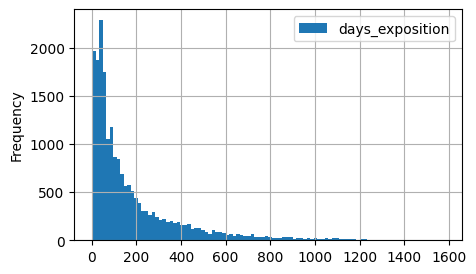

In [139]:
histogram('days_exposition')

Построим гистограмму распределения времени продажи квартир для периода до 100 дней.

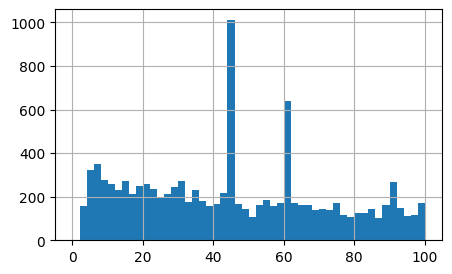

In [140]:
data['days_exposition'].hist(range=(0, 100), figsize=(5,3), bins=50)
plt.show()

Выведем описание столба `days_exposition` методом `describe`.

In [141]:
data['days_exposition'].describe()

count   20,257.00
mean       181.30
std        220.02
min          1.00
25%         45.00
50%         96.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

**Вывод** 

Исходя из данных, обычно продажа квартиры занимает ~ 181 день (среднее значение). 
Половина квартир была продана за 96 дней (медиана). 
Пики продаж квартир были на 45-й и 60-й день размещения объявления. 
Продажу квартиры за 1 день (минимум) можно считать быстрой. 
Продажу квартиры за 1580 дней (максимум) можно считать необычно долгой. 
Большинство квартир продаётся за 513 дней (3-й квартиль + 1.5 межквартильного размаха).

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучим, зависит ли цена от:
*	общей площади
*	жилой площади
*	площади кухни
*	количества комнат
*	этажа, на котором расположена квартира (первый, последний, другой)
*	даты размещения (день недели, месяц, год)

Построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией мы будем использовать сводные таблицы.

##### Зависимость `цены` от `общей площади`

Построим сводную таблицу зависимости цены объекта от общей площади.

In [142]:
# создадим сводную таблицу зависимости цены объекта от общей площади
last_price_total_area = data.pivot_table(index='last_price', values='total_area').reset_index()
last_price_total_area

,last_price,total_area
0,0.43,42.20
1,0.44,40.00
2,0.45,40.10
3,0.47,40.75
4,0.48,32.00
...,...,...
2917,289.24,187.50
2918,300.00,618.00
2919,330.00,190.00
2920,401.30,401.00


Построим график зависимости цены объекта от общей площади.

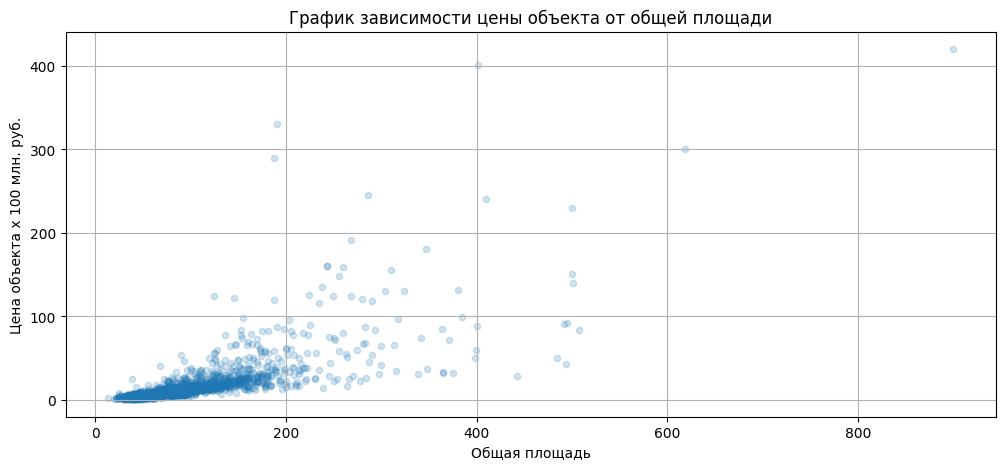

In [143]:
last_price_total_area.plot(x='total_area', y='last_price', kind='scatter', grid=True,\
                           title='График зависимости цены объекта от общей площади',\
                           xlabel='Общая площадь', ylabel='Цена объекта х 100 млн. руб.',\
                           figsize=(12,5), alpha=0.2
                          )
plt.show()

На графике видно, что стоимость объекта недвижимости зависит от его общей площади. При возрастании общей площади цена объекта возрастает. Это логично, т.к. стоимость объекта рассчитывается умножением его общей площади на стоимость квадратного метра. Мы также видим, что цены на объекты общей площадью до 100-150 м2 отличаются не так сильно, чем цены на объекты общей площадью более 150 м2. Возможно это связано с дополнительными факторами, месторасположением объекта, его состоянием, инфраструкторой рядом и т.д.

##### Зависимость `цены` от `жилой площади`

Построим сводную таблицу зависимости цены объекта от жилой площади.

In [144]:
# создадим сводную таблицу зависимости цены объекта от жилой площади
last_price_living_area = data.pivot_table(index='last_price', values='living_area').reset_index()
last_price_living_area

,last_price,living_area
0,0.43,23.58
1,0.44,23.08
2,0.45,23.20
3,0.47,24.67
4,0.48,16.00
...,...,...
2917,289.24,63.70
2918,300.00,258.00
2919,330.00,95.00
2920,401.30,204.00


Построим график зависимости цены объекта от жилой площади.

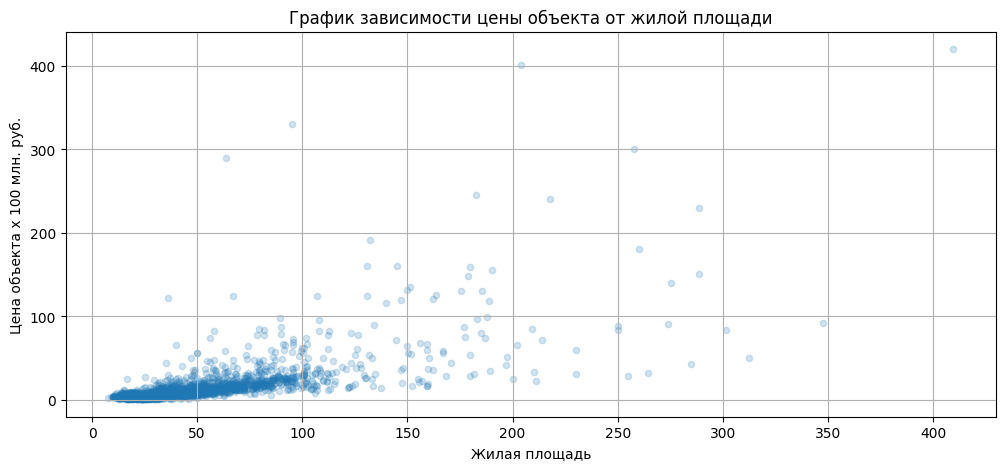

In [145]:
last_price_living_area.plot(x='living_area', y='last_price', kind='scatter', grid=True,\
                           title='График зависимости цены объекта от жилой площади',\
                           xlabel='Жилая площадь', ylabel='Цена объекта х 100 млн. руб.',\
                           figsize=(12,5), alpha=0.2
                          )
plt.show()

На графике видно, что стоимость объекта недвижимости зависит от его жилой площади. При возрастании жилой площади цена объекта возрастает. Но зависимость не такая сильная, как в случае с общей площадью. Всё-таки при покупке недвижимости важнее общая площадь объекта.

##### Зависимость `цены` от `площади кухни`

Построим сводную таблицу зависимости цены объекта от жилой площади.

In [146]:
# создадим сводную таблицу зависимости цены объекта от площади кухни
last_price_kitchen_area = data.pivot_table(index='last_price', values='kitchen_area').reset_index()
last_price_kitchen_area

,last_price,kitchen_area
0,0.43,7.72
1,0.44,7.00
2,0.45,6.63
3,0.47,6.99
4,0.48,5.60
...,...,...
2917,289.24,30.20
2918,300.00,70.00
2919,330.00,40.00
2920,401.30,24.00


Построим график зависимости цены объекта от площади кухни.

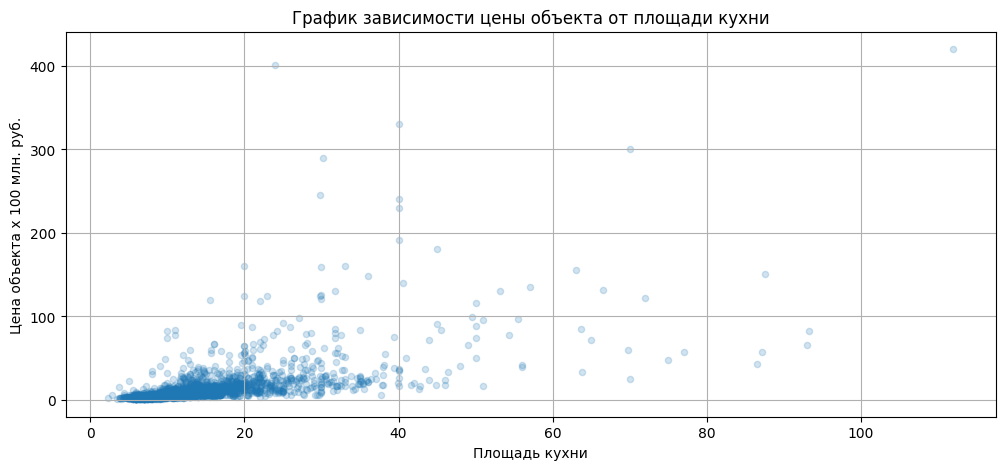

In [147]:
last_price_kitchen_area.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True,\
                           title='График зависимости цены объекта от площади кухни',\
                           xlabel='Площадь кухни', ylabel='Цена объекта х 100 млн. руб.',\
                           figsize=(12,5), alpha=0.2
                          )
plt.show()

На графике видно, что стоимость объекта недвижимости зависит от его площади кухни. При возрастании площади кухни цена объекта возрастает. Но, как и для жилой площади, зависимость между площадью кухни и ценой не такая сильная, как в случае с общей площадью.

##### Зависимость `цены` от `количества комнат`

Построим сводную таблицу зависимости цены объекта от количества комнат.

In [148]:
# создадим сводную таблицу зависимости цены объекта от количества комнат
last_price_rooms = data.pivot_table(index='last_price', values='rooms').round().reset_index()
last_price_rooms

,last_price,rooms
0,0.43,2.00
1,0.44,1.00
2,0.45,2.00
3,0.47,2.00
4,0.48,1.00
...,...,...
2917,289.24,2.00
2918,300.00,7.00
2919,330.00,3.00
2920,401.30,5.00


Построим график зависимости цены объекта от количества комнат.

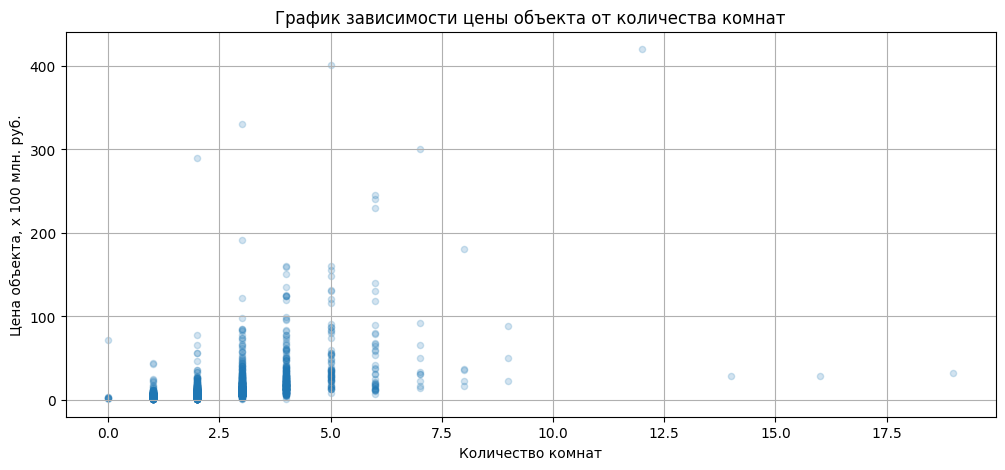

In [149]:
last_price_rooms.plot(x='rooms', y='last_price', kind='scatter', grid=True,\
                           title='График зависимости цены объекта от количества комнат',\
                           xlabel='Количество комнат', ylabel='Цена объекта, х 100 млн. руб.',\
                           figsize=(12,5), alpha=0.2
                          )
plt.show()

На графике видно, что зависимость стоимости объекта от количества комнат прослеживается. Если рассмотреть объекты с количеством комнат до 5, то стоимость таких объектов растёт с увеличением числа комнат, но зависимость слабая. Для объект с 5-ю и более комнатами зависимость цены объекта и количества комнат не прослеживается.

##### Зависимость `цены` от `этажа`, на котором расположена квартира (первый, последний, другой)

Построим сводную таблицу зависимости цены объекта от категории этажа: первый, последний, другой.

In [150]:
# создадим сводную таблицу зависимости цены объекта от этажа
last_price_floor_category = data.pivot_table(index='floor_category', values='last_price',\
                                             aggfunc='median').sort_values(by='last_price').reset_index()
last_price_floor_category

,floor_category,last_price
0,первый,3.90
1,последний,4.30
2,другой,4.85


Построим график зависимости цены объекта от категории этажа.

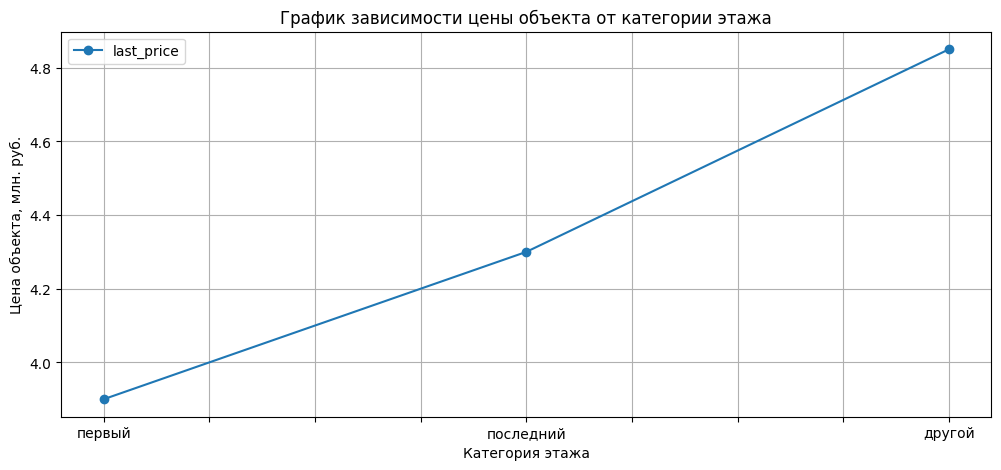

In [151]:
last_price_floor_category.plot(x='floor_category', y='last_price', style='o-', grid=True,\
                               title='График зависимости цены объекта от категории этажа',\
                               xlabel='Категория этажа', ylabel='Цена объекта, млн. руб.',\
                               figsize=(12,5)
                              )
plt.show()

По графику видно, что дешевле всего недвижимость на первой этаже, чуть дороже стоит недвижимость на последнем этаже. Наибольшая стоимость у квартир категории "другой", расположенных не на первом и не на последнем этаже.

##### Зависимость `цены` от `даты размещения (день недели, месяц, год)`

Построим сводную таблицу зависимости цены объекта от дня недели размещения объявления.

In [152]:
# создадим сводную таблицу зависимости цены объекта от дня недели
last_price_weekday_publication = data.pivot_table(index='weekday_publication', values='last_price').reset_index()
last_price_weekday_publication

,weekday_publication,last_price
0,0,6.52
1,1,6.39
2,2,6.59
3,3,6.69
4,4,6.37
5,5,6.61
6,6,6.25


Построим график зависимости цены объекта от дня недели размещения объявления.

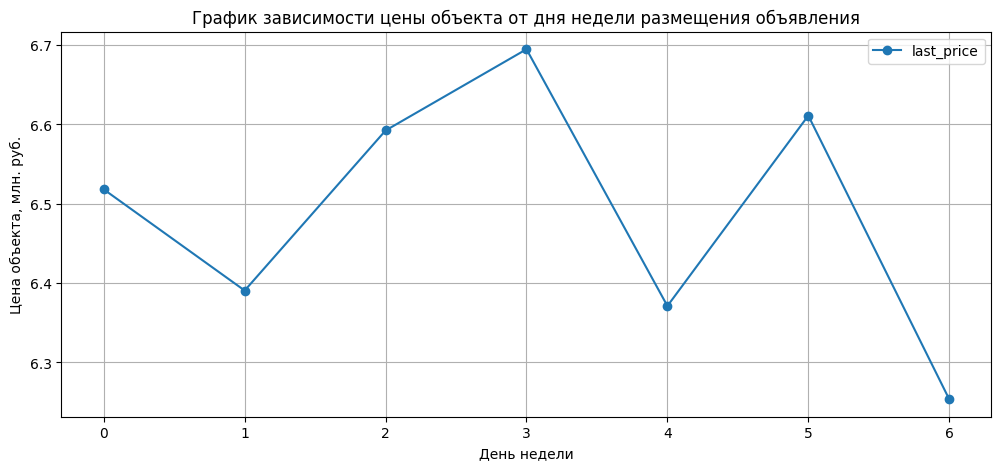

In [153]:
last_price_weekday_publication.plot(x='weekday_publication', y='last_price', style='o-', grid=True,\
                               title='График зависимости цены объекта от дня недели размещения объявления',\
                               xlabel='День недели', ylabel='Цена объекта, млн. руб.',\
                               figsize=(12,5)
                              )
plt.show()

По графику видно, что дороже всего квартиры, выложенные на продажу в четверг, а дешевле всего - в воскресенье. 
Зависимость цены объекта от дня недели размещения объявления не наблюдается. 

Построим сводную таблицу зависимости цены объекта от месяца размещения объявления.

In [154]:
# создадим сводную таблицу зависимости цены объекта от месяца
last_price_month_publication = data.pivot_table(index='month_publication', values='last_price').reset_index()
last_price_month_publication

,month_publication,last_price
0,1,6.68
1,2,6.48
2,3,6.36
3,4,6.75
4,5,6.62
5,6,6.29
6,7,6.64
7,8,6.34
8,9,6.45
9,10,6.17


Построим график зависимости цены объекта от месяца размещения объявления.

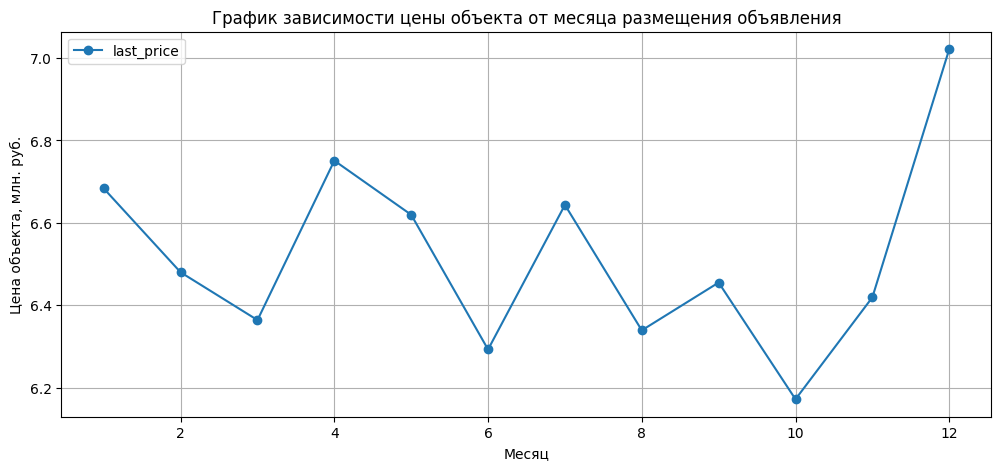

In [155]:
last_price_month_publication.plot(x='month_publication', y='last_price', style='o-', grid=True,\
                               title='График зависимости цены объекта от месяца размещения объявления',\
                               xlabel='Месяц', ylabel='Цена объекта, млн. руб.',\
                               figsize=(12,5)
                              )
plt.show()

На графике видим, что дороже всего квартиры, выложенные на продажу в декабре, а дешевле всего - в октябре. Зависимость цены объекта от месяца размещения объявления не наблюдается.

Построим сводную таблицу зависимости цены объекта от года размещения объявления.

In [156]:
# создадим сводную таблицу зависимости цены объекта от года
last_price_year_publication = data.pivot_table(index='year_publication', values='last_price').reset_index()
last_price_year_publication

,year_publication,last_price
0,2014,12.28
1,2015,8.53
2,2016,6.82
3,2017,6.48
4,2018,5.95
5,2019,6.79


Построим график зависимости цены объекта от года размещения объявления.

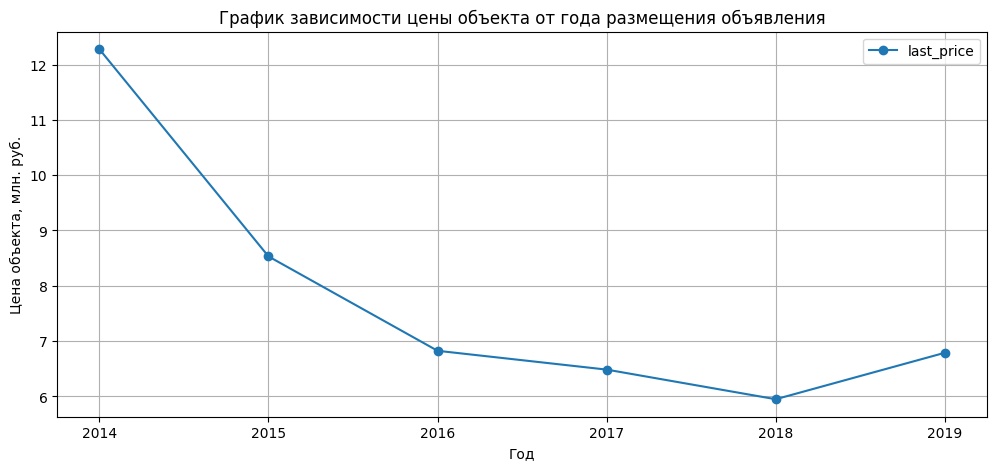

In [157]:
last_price_year_publication.plot(x='year_publication', y='last_price', style='o-', grid=True,\
                               title='График зависимости цены объекта от года размещения объявления',\
                               xlabel='Год', ylabel='Цена объекта, млн. руб.',\
                               figsize=(12,5)
                              )
plt.show()

На графике видим, что дороже всего квартиры, выложенные на продажу в 2014 году, а дешевле всего выложенные в 2018 году. 
Средняя стоимость квартир с 2014 года снижалась и была ниже всего в 2016-2019 годах.

**Вывод**

Изучив зависимость цены недвижимости от его площади (общей, жилой, площади кухни), количества комнат, можно ометить, что наибольшая зависимость цены объекта от общей площади. Не так выражено, как с общей площадью, но просматривается зависимость цены объекта от жилой площади и площади кухни. По остальным исследованным параметрам такая зависимость не прослеживается.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Выведем 10 населенных пунктов с наибольшим числом объявлений.

In [158]:
top_cities = data['locality_name'].value_counts().head(10)
top_cities

Санкт-Петербург      15521
поселок Мурино         539
поселок Шушары         437
Всеволожск             390
Пушкин                 368
Колпино                337
поселок Парголово      326
Гатчина                303
деревня Кудрово        295
Выборг                 234
Name: locality_name, dtype: int64

In [159]:
top_cities_sq_meter = data.query('locality_name in @top_cities.index'
                                ).pivot_table(index='locality_name', values='sq_meter_price'
                                             ).astype(int).sort_values('sq_meter_price', ascending=False).reset_index()
top_cities_sq_meter

,locality_name,sq_meter_price
0,Санкт-Петербург,114524
1,Пушкин,103180
2,деревня Кудрово,92447
3,поселок Парголово,90135
4,поселок Мурино,85364
5,поселок Шушары,78484
6,Колпино,75480
7,Гатчина,68625
8,Всеволожск,68583
9,Выборг,58303


**Вывод**

Наибольшая средняя стоимость квадратного метра недвижимости в Санкт-Петербурге. На 2-м месте город Пушкин, что, вероятно, вызвано известностью этого города историческими достопримечательностями и живописными парками, на 3-м месте деревня Кудрово - спальный район возле границы Санкт-Петербурга внутри КАД. Наименьшая стоимость квадратного метра в городе Выборге, т.к. не большой по численности, находится в Ленинградской области на удалении от Санкт-Петербурга.

#### Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

Выведем график средней цены объектов для каждого километра в Санкт-Петербурге. 

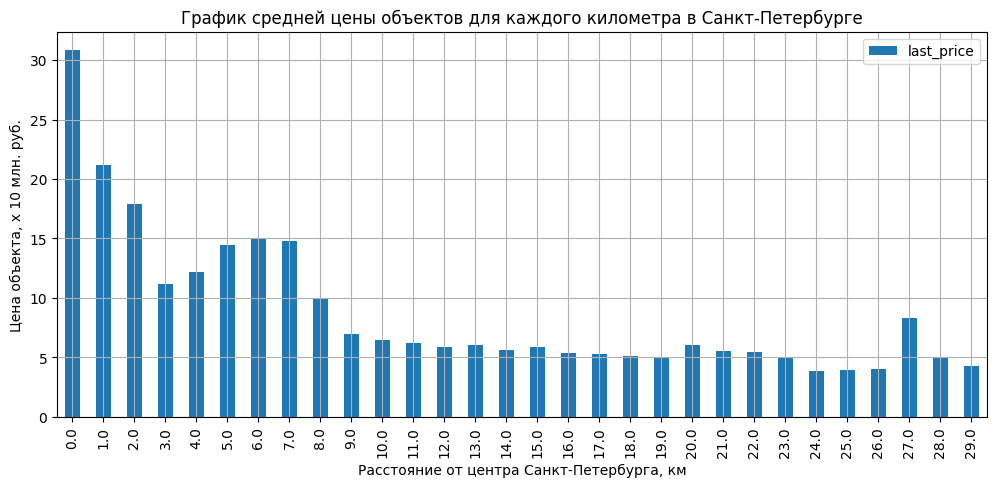

In [160]:
data.query('locality_name == "Санкт-Петербург"'
          ).pivot_table(index='city_center_distance', values='last_price'
                       ).plot(grid=True, style='o-', xlim=(0,29), figsize=(12, 5),\
                              xlabel='Расстояние от центра Санкт-Петербурга, км',\
                              ylabel='Цена объекта, х 10 млн. руб.',\
                              title='График средней цены объектов для каждого километра в Санкт-Петербурге', kind='bar'
                             )
plt.show()

**Вывод** 

На графике мы видим уменьшение стоимости объектов с ростом расстояния от центра города. Самая высокая цена на объекты на расстоянии от 0 до 1 км от центра города, далее стоимость объектов резко падает. Самым центром Санкт-Петербурга можно считать расстояние до 1 км от центра города. Также мы видим небольшое повышение стоимости объектов на расстоянии 5-7 км от центра, что может быть связано с нахождением в этих районах элитного жилья, дальше 7 км от центра идёт постепенное снижение стоимости объектов, но оно не резкое. На удалении 27 км от центра мы видим небольшой пик, стоимость объектов выше, чем на более близком расстоянии от центра города. Это может быть связано с тем, что на таком расстоянии находится один из пригородов Санкт-Петербурга, например, город Пушкин, где стоимость за кв. метр недвижимости высока (из предыдущего исследования на 2-м месте после Санкт-Петербурга), соответственно и стоимость объектов в нём будет выше, чем в соседних районах.

### Общий вывод

В данном проекте мы исследовали факторы, которые больше всего влияют на общую стоимость объекта недвижимости в Санкт-Петербурге и соседних населённых пунктах, используя данные сервиса Яндекс Недвижимость за несколько лет. 

     Исходя из проведенного исследования можно отметить следующее:
*    Наибольшая зависимость цены объекта от общей площади объекта. Также наблюдается зависимость стоимости объекта от жилой площади и площади кухни, но она слабее, чем зависимость от общей площади.  

*    Стоимость недвижимости не на первом и не на последнем этажах выше, чем на указанных этажах.  

*    Количество комнат несильно, но влияет на стоимость объекта. Чем больше комнат, тем дороже недвижимость, но если комнат не более 4-х.  

*    Нет однозначной зависимости от дня, месяца, года размещения объявления о продаже недвижимости.  

*    Большинство объектов продаётся за 1 год и 5 месяцев. В среднем продажа квартиры занимает около 6 месяцев.  

*    Наибольшая средняя стоимость квадратного метра недвижимости в самом крупном городе - Санкт-Петербурге. По мере удаления от центра города стоимость за квадратный метр недвижимости ожидаемо снижается, за исключением новых и элитных районов, где стоимость, как правило выше. Также можно отметить, что в некоторых пригородах Санкт-Петербурга (например, город Пушкин), из-за их осбенностей (исторической популярности и ценности),  несмотря на удаление от центра стоимость жилья может быть выше, чем в соседних населенных пунктах.